# Analysis of 3k T cells from cancer

In [1]:
# This cell is for development only. Don't copy this to your notebook.
%load_ext autoreload
%autoreload 2

# Temporarily suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

/Users/runner/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [4]:
adata = ir.datasets.wu2020_3k()

try downloading from url
https://github.com/scverse/scirpy/releases/download/d0.1.0/wu2020_3k.h5ad
... this may take a while but only happens once


creating directory /Users/runner/work/scirpy/scirpy/docs/tutorials/data/ for saving data


  0%|          | 0.00/16.0M [00:00<?, ?B/s]

 50%|█████     | 8.01M/16.0M [00:00<00:00, 83.8MB/s]

100%|██████████| 16.0M/16.0M [00:00<00:00, 80.7MB/s]

In [5]:
adata.shape

(3000, 30727)

In [6]:
adata.obs

cluster_orig patient sample source  \
LN1_GTAGGCCAGCGTAGTG-1-19      4.4-FOS   Lung1    LN1    NAT   
RN2_AGAGCGACAGATTGCT-1-27      4.4-FOS  Renal2    RN2    NAT   
LN1_GTCATTTCAATGAAAC-1-19      8.2-Tem   Lung1    LN1    NAT   
LN2_GACACGCAGGTAGCTG-2-2     8.6-KLRB1   Lung2    LN2    NAT   
LN2_GCACTCTCAGGGATTG-2-2       4.4-FOS   Lung2    LN2    NAT   
...                                ...     ...    ...    ...   
RT3_GCAGTTAGTATGAAAC-1-6     4.2-RPL32  Renal3    RT3  Tumor   
LT1_GACGTGCTCTCAAGTG-1-24      8.2-Tem   Lung1    LT1  Tumor   
ET3_GCTGGGTAGACCTTTG-1-3        3.1-MT   Endo3    ET3  Tumor   
RT1_TAAGAGATCCTTAATC-1-8     4.5-IL6ST  Renal1    RT1  Tumor   
LN2_TCTGAGAAGGACACCA-2-2     4.6b-Treg   Lung2    LN2    NAT   

                             clonotype_orig multi_chain IR_VJ_1_locus  \
LN1_GTAGGCCAGCGTAGTG-1-19     lung1.tn.C223       False           nan   
RN2_AGAGCGACAGATTGCT-1-27  renal2.tnb.C1362       False           TRA   
LN1_GTCATTTCAATGAAAC-1-19      lung1.tn.C25       False           TRA   
LN2_GACACGCAGGTAGCTG-2-2     lung2.tn.C2452       False           nan   
LN2_GCACTCTCAGGGATTG-2-2     lung2.tn.C5631       False           TRA   
...                                     ...         ...           ...   
RT3_GCAGTTAGTATGAAAC-1-6    renal3.tnb.C176       False           TRA   
LT1_GACGTGCTCTCAAGTG-1-24     lung1.tn.C151       False           TRA   
ET3_GCTGGGTAGACCTTTG-1-3       endo3.tn.C76       False           nan   
RT1_TAAGAGATCCTTAATC-1-8     renal1.tnb.C83       False           TRA   
LN2_TCTGAGAAGGACACCA-2-2     lung2.tn.C6211       False           TRA   

                          IR_VJ_2_locus IR_VDJ_1_locus IR_VDJ_2_locus  ...  \
LN1_GTAGGCCAGCGTAGTG-1-19           nan            TRB            TRB  ...   
RN2_AGAGCGACAGATTGCT-1-27           nan            TRB            nan  ...   
LN1_GTCATTTCAATGAAAC-1-19           nan            TRB            nan  ...   
LN2_GACACGCAGGTAGCTG-2-2            nan            TRB            nan  ...   
LN2_GCACTCTCAGGGATTG-2-2            nan            TRB            nan  ...   
...                                 ...            ...            ...  ...   
RT3_GCAGTTAGTATGAAAC-1-6            nan            TRB            nan  ...   
LT1_GACGTGCTCTCAAGTG-1-24           nan            nan            nan  ...   
ET3_GCTGGGTAGACCTTTG-1-3            nan            TRB            nan  ...   
RT1_TAAGAGATCCTTAATC-1-8            nan            TRB            nan  ...   
LN2_TCTGAGAAGGACACCA-2-2            nan            TRB            nan  ...   

                          IR_VJ_2_c_call IR_VDJ_1_c_call IR_VDJ_2_c_call  \
LN1_GTAGGCCAGCGTAGTG-1-19            nan           TRBC2           TRBC2   
RN2_AGAGCGACAGATTGCT-1-27            nan           TRBC1             nan   
LN1_GTCATTTCAATGAAAC-1-19            nan           TRBC1             nan   
LN2_GACACGCAGGTAGCTG-2-2             nan           TRBC2             nan   
LN2_GCACTCTCAGGGATTG-2-2             nan           TRBC1             nan   
...                                  ...             ...             ...   
RT3_GCAGTTAGTATGAAAC-1-6             nan           TRBC2             nan   
LT1_GACGTGCTCTCAAGTG-1-24            nan             nan             nan   
ET3_GCTGGGTAGACCTTTG-1-3             nan           TRBC2             nan   
RT1_TAAGAGATCCTTAATC-1-8             nan           TRBC2             nan   
LN2_TCTGAGAAGGACACCA-2-2             nan           TRBC2             nan   

                                                           IR_VJ_1_junction  \
LN1_GTAGGCCAGCGTAGTG-1-19                                              None   
RN2_AGAGCGACAGATTGCT-1-27           TGTGCTGTGAGGGGGAATAACAATGCCAGACTCATGTTT   
LN1_GTCATTTCAATGAAAC-1-19                 TGTGCTGTGAGGTTGGGTAACCAGTTCTATTTT   
LN2_GACACGCAGGTAGCTG-2-2                                               None   
LN2_GCACTCTCAGGGATTG-2-2   TGTGCAGCAAGCGACCCCACGGTCGAGGCAGGAACTGCTCTGATCTTT   
...                                                     

## Preprocess Transcriptomics data

Transcriptomics data needs to be filtered and preprocessed as with any other single-cell dataset.
We recommend following the [scanpy tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)
and the best practice paper by [Luecken et al.](https://www.embopress.org/doi/10.15252/msb.20188746)

In [7]:
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.filter_cells(adata, min_genes=100)

filtered out 18877 genes that are detected in less than 10 cells


In [8]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1000)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=5000)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

normalizing by total count per cell


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


If you pass `n_top_genes`, all cutoffs are ignored.


extracting highly variable genes


    finished (0:00:00)


computing PCA


    on highly variable genes


    with n_comps=50


    finished (0:00:01)


computing neighbors


    using 'X_pca' with n_pcs = 50


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:03)


For the _Wu2020_ dataset, the authors already provide clusters and UMAP coordinates.
Instead of performing clustering and cluster annotation ourselves, we will just use
the provided data. The clustering and annotation methodology is
described in [their paper](https://doi.org/10.1038/s41586-020-2056-8).

In [9]:
adata.obsm["X_umap"] = adata.obsm["X_umap_orig"]

In [10]:
mapping = {
    "nan": "other",
    "3.1-MT": "other",
    "4.1-Trm": "CD4_Trm",
    "4.2-RPL32": "CD4_RPL32",
    "4.3-TCF7": "CD4_TCF7",
    "4.4-FOS": "CD4_FOSS",
    "4.5-IL6ST": "CD4_IL6ST",
    "4.6a-Treg": "CD4_Treg",
    "4.6b-Treg": "CD4_Treg",
    "8.1-Teff": "CD8_Teff",
    "8.2-Tem": "CD8_Tem",
    "8.3a-Trm": "CD8_Trm",
    "8.3b-Trm": "CD8_Trm",
    "8.3c-Trm": "CD8_Trm",
    "8.4-Chrom": "other",
    "8.5-Mitosis": "other",
    "8.6-KLRB1": "other",
}
adata.obs["cluster"] = [mapping[x] for x in adata.obs["cluster_orig"]]

Let's inspect the UMAP plots. The first three panels show the UMAP plot colored by sample, patient and cluster.
We don't observe any clustering of samples or patients that could hint at batch effects.

The last three panels show the UMAP colored by the T cell markers _CD8_, _CD4_, and _FOXP3_.
We can confirm that the markers correspond to their respective cluster labels.

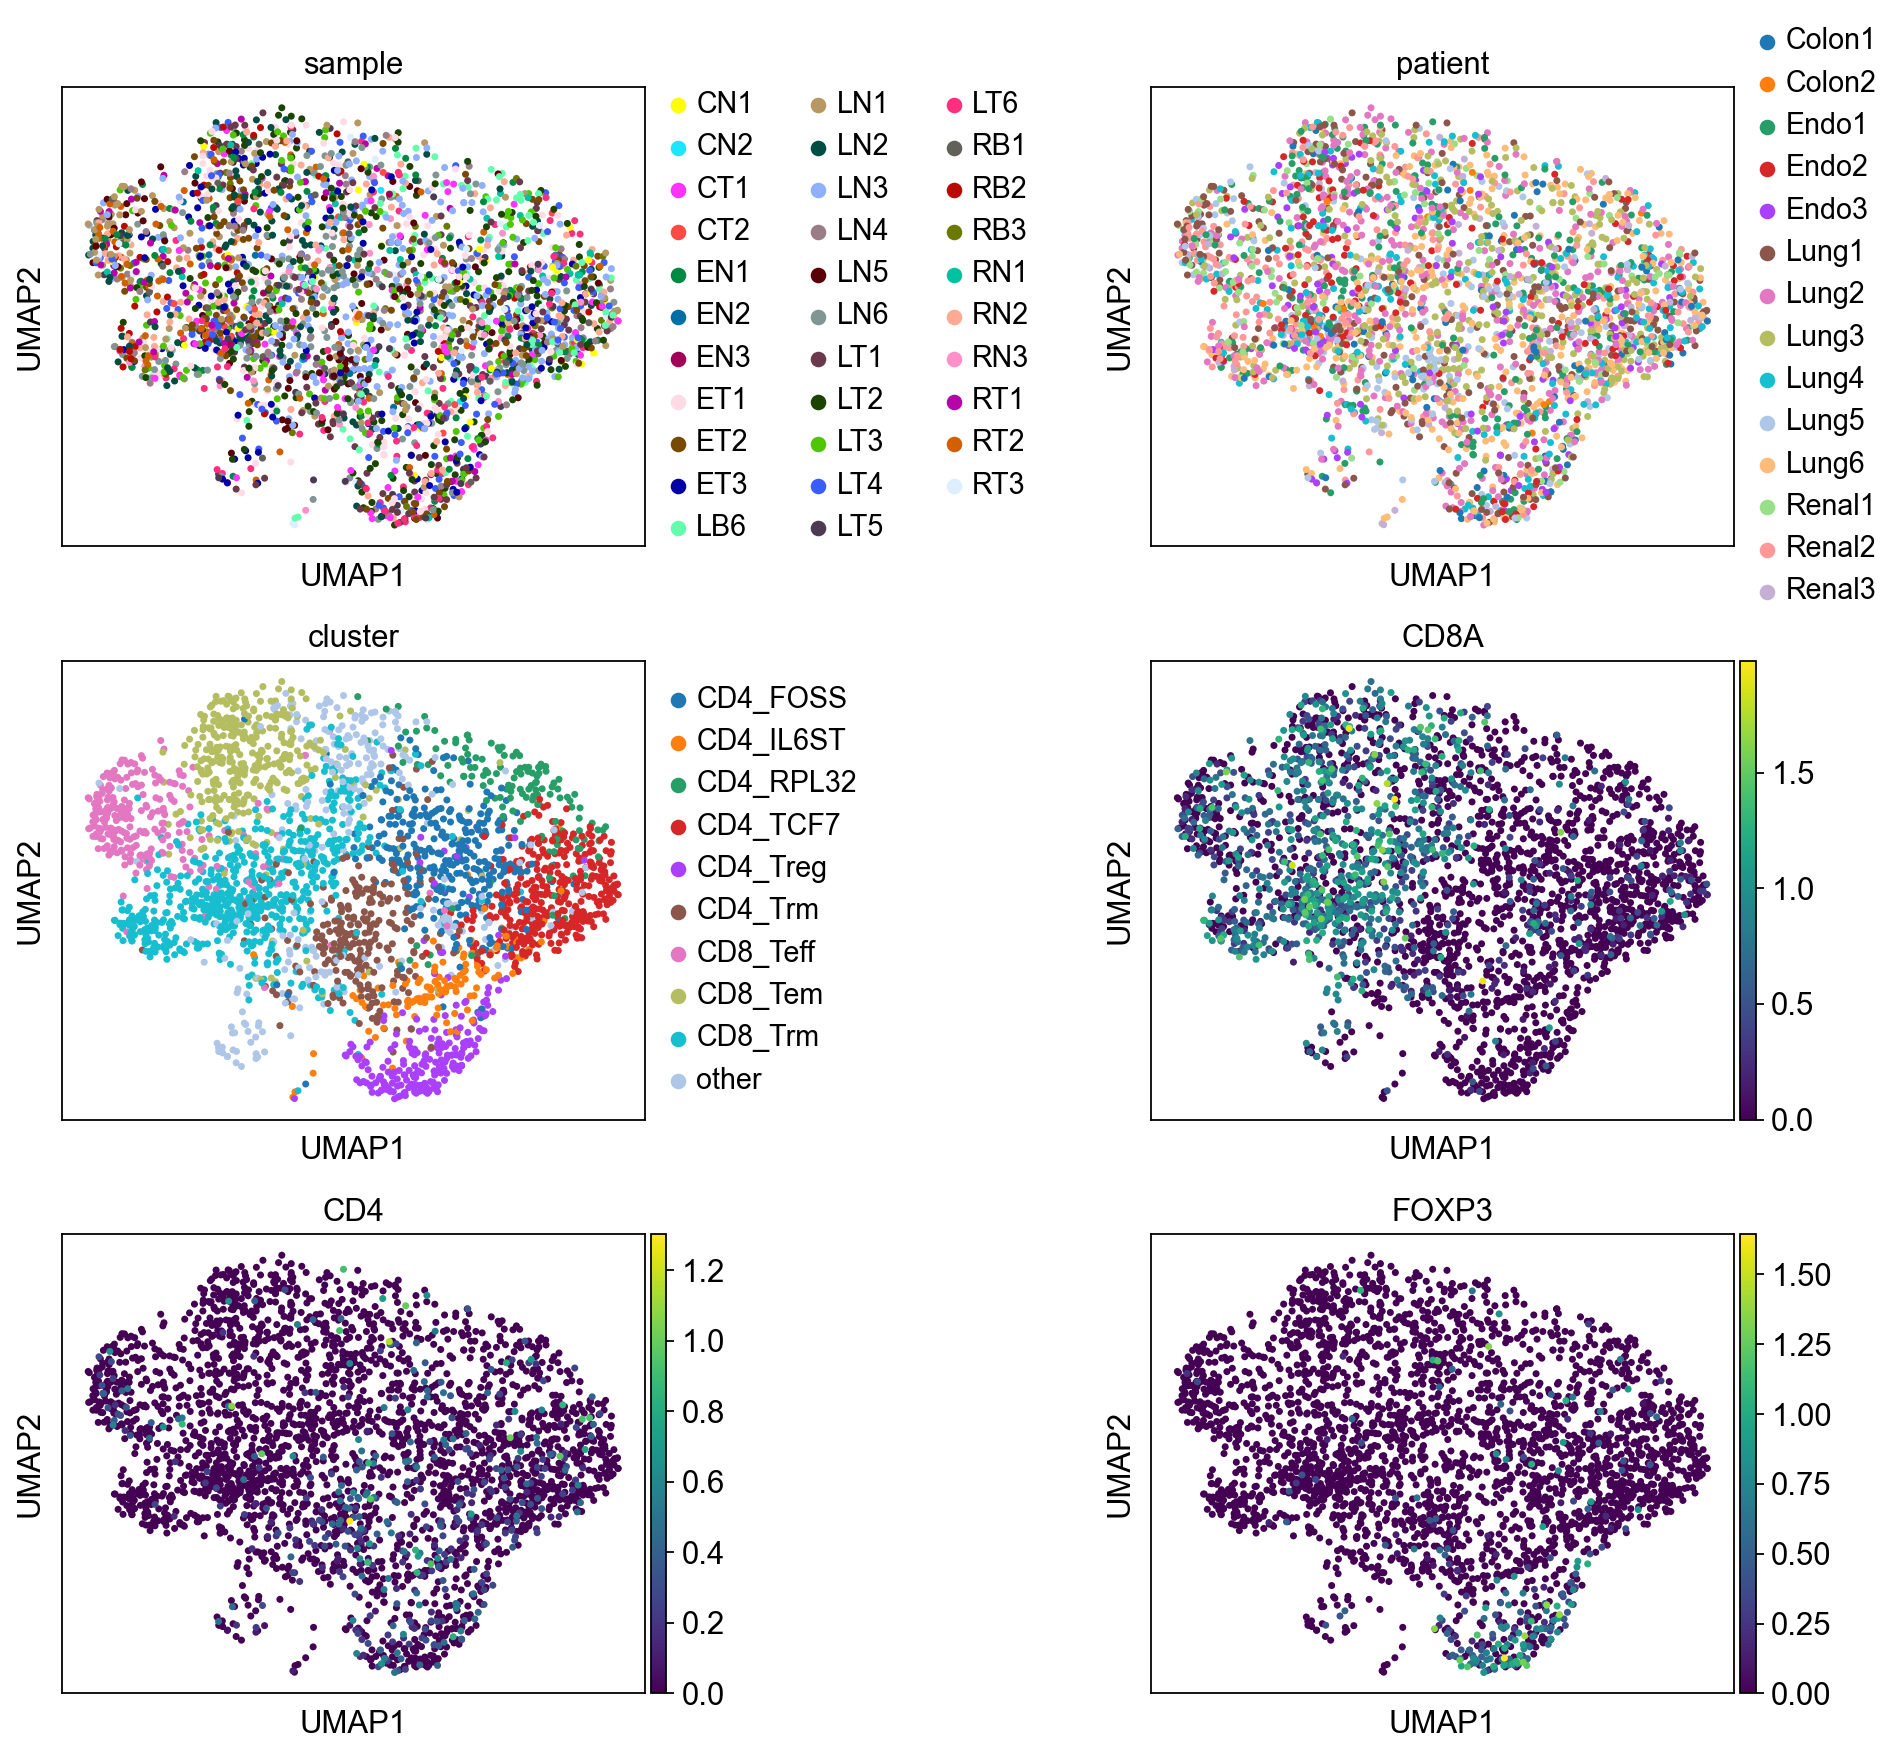

In [11]:
sc.pl.umap(
    adata,
    color=["sample", "patient", "cluster", "CD8A", "CD4", "FOXP3"],
    ncols=2,
    wspace=0.7,
)

## TCR Quality Control

In [12]:
ir.tl.chain_qc(adata)

As expected, the dataset contains only α/β T-cell receptors:

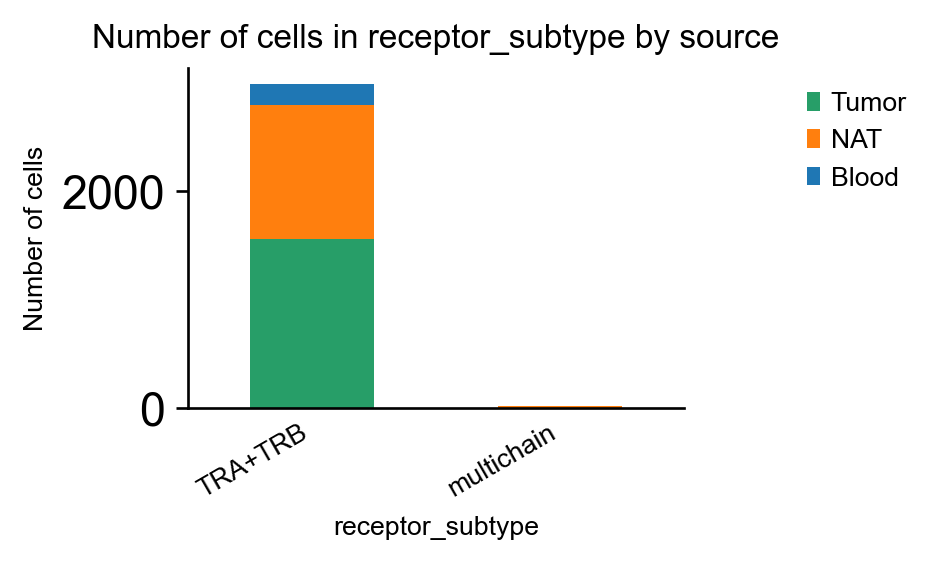

In [13]:
ax = ir.pl.group_abundance(adata, groupby="receptor_subtype", target_col="source")

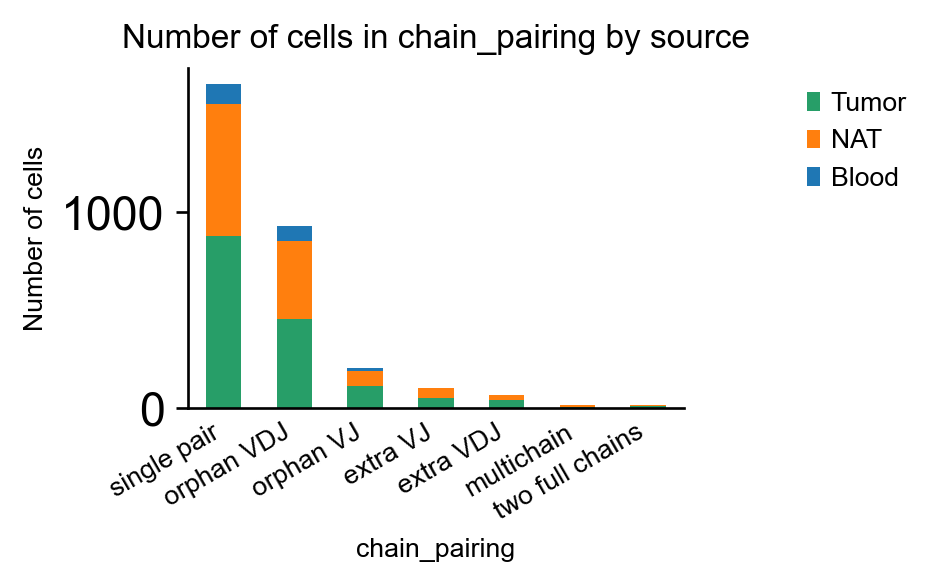

In [14]:
ax = ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="source")

Indeed, in this dataset, ~6% of cells have more than
one pair of productive T-cell receptors:

In [15]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(
            adata.obs["chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains"]
            )
        )
        / adata.n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.06


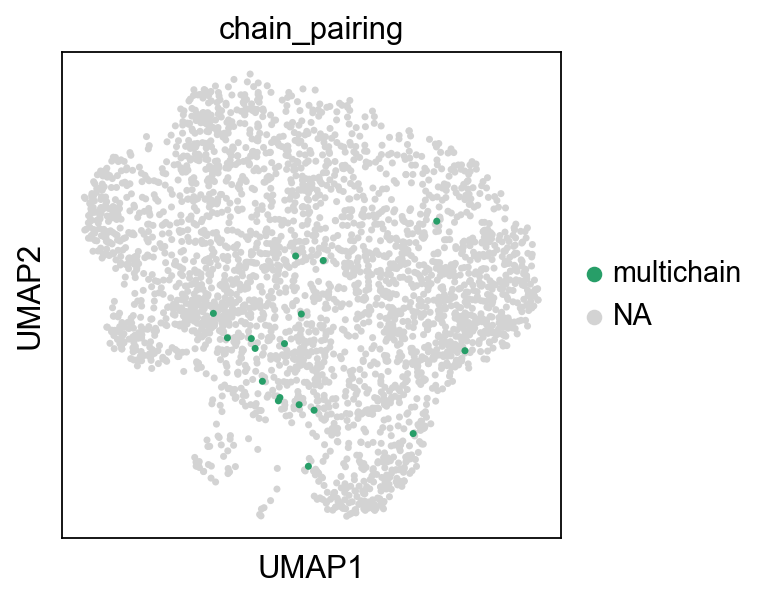

In [16]:
sc.pl.umap(adata, color="chain_pairing", groups="multichain")

In [17]:
adata = adata[adata.obs["chain_pairing"] != "multichain", :].copy()

Similarly, we can use the `chain_pairing` information to exclude all cells that don't have at least 
one full pair of receptor sequences:

In [18]:
adata = adata[~adata.obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"]), :].copy()

Finally, we re-create the chain-pairing plot to ensure that the filtering worked 
as expected: 

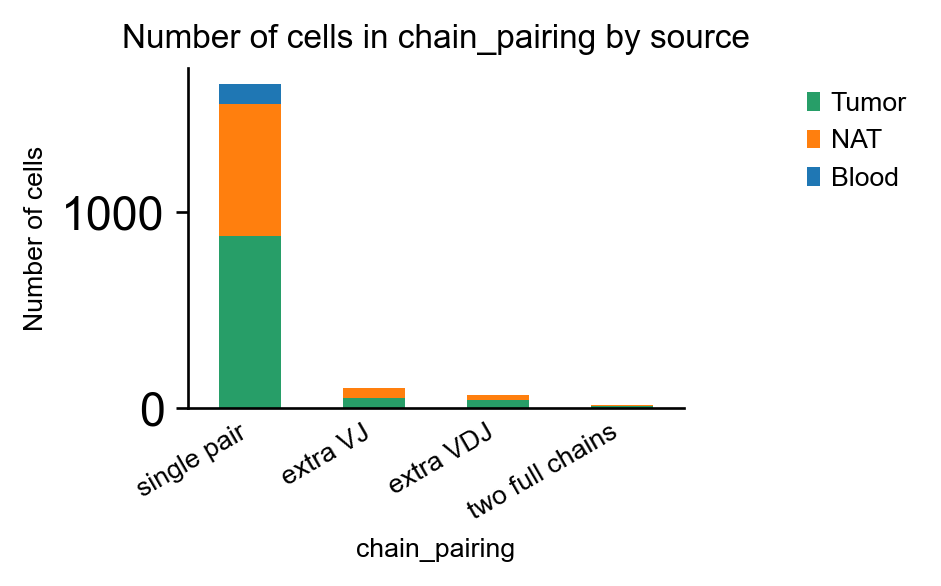

In [19]:
ax = ir.pl.group_abundance(adata, groupby="chain_pairing", target_col="source")

## Define clonotypes and clonotype clusters

### Compute CDR3 neighborhood graph and define clonotypes

In [20]:
# using default parameters, `ir_dist` will compute nucleotide sequence identity
ir.pp.ir_dist(adata)
ir.tl.define_clonotypes(adata, receptor_arms="all", dual_ir="primary_only")

Computing sequence x sequence distance matrix for VJ sequences.


Computing sequence x sequence distance matrix for VDJ sequences.


Initializing lookup tables. 


Computing clonotype x clonotype distances.


  0%|          | 0/1526 [00:00<?, ?it/s]

  2%|▏         | 27/1526 [00:00<00:05, 269.46it/s]

  4%|▎         | 54/1526 [00:00<00:05, 267.70it/s]

  5%|▌         | 81/1526 [00:00<00:05, 267.86it/s]

  7%|▋         | 112/1526 [00:00<00:04, 283.26it/s]

  9%|▉         | 141/1526 [00:00<00:04, 279.52it/s]

 11%|█         | 169/1526 [00:00<00:04, 271.54it/s]

 13%|█▎        | 197/1526 [00:00<00:05, 263.98it/s]

 15%|█▍        | 224/1526 [00:00<00:04, 261.13it/s]

 16%|█▋        | 251/1526 [00:00<00:04, 257.90it/s]

 18%|█▊        | 281/1526 [00:01<00:04, 268.22it/s]

 20%|██        | 308/1526 [00:01<00:04, 267.72it/s]

 22%|██▏       | 338/1526 [00:01<00:04, 275.30it/s]

 24%|██▍       | 369/1526 [00:01<00:04, 284.79it/s]

 26%|██▌       | 398/1526 [00:01<00:04, 281.36it/s]

 28%|██▊       | 427/1526 [00:01<00:03, 280.06it/s]

 30%|███       | 458/1526 [00:01<00:03, 287.00it/s]

 32%|███▏      | 487/1526 [00:01<00:03, 283.52it/s]

 34%|███▍      | 518/1526 [00:01<00:03, 290.08it/s]

 36%|███▌      | 548/1526 [00:01<00:03, 290.03it/s]

 38%|███▊      | 579/1526 [00:02<00:03, 294.57it/s]

 40%|████      | 611/1526 [00:02<00:03, 300.41it/s]

 42%|████▏     | 642/1526 [00:02<00:02, 295.74it/s]

 44%|████▍     | 672/1526 [00:02<00:02, 286.41it/s]

 46%|████▌     | 701/1526 [00:02<00:02, 281.75it/s]

 48%|████▊     | 730/1526 [00:02<00:02, 281.78it/s]

 50%|████▉     | 759/1526 [00:02<00:02, 275.98it/s]

 52%|█████▏    | 787/1526 [00:02<00:02, 272.39it/s]

 53%|█████▎    | 815/1526 [00:02<00:02, 269.67it/s]

 56%|█████▌    | 847/1526 [00:03<00:02, 282.34it/s]

 57%|█████▋    | 876/1526 [00:03<00:02, 283.15it/s]

 59%|█████▉    | 907/1526 [00:03<00:02, 290.31it/s]

 62%|██████▏   | 939/1526 [00:03<00:01, 297.15it/s]

 64%|██████▎   | 970/1526 [00:03<00:01, 298.25it/s]

 66%|██████▌   | 1000/1526 [00:03<00:01, 285.73it/s]

 67%|██████▋   | 1029/1526 [00:03<00:01, 278.13it/s]

 69%|██████▉   | 1057/1526 [00:03<00:01, 277.61it/s]

 71%|███████   | 1085/1526 [00:03<00:01, 275.76it/s]

 73%|███████▎  | 1113/1526 [00:03<00:01, 273.19it/s]

 75%|███████▍  | 1141/1526 [00:04<00:01, 273.42it/s]

 77%|███████▋  | 1169/1526 [00:04<00:01, 272.71it/s]

 78%|███████▊  | 1197/1526 [00:04<00:01, 272.40it/s]

 80%|████████  | 1226/1526 [00:04<00:01, 276.05it/s]

 82%|████████▏ | 1257/1526 [00:04<00:00, 285.21it/s]

 84%|████████▍ | 1288/1526 [00:04<00:00, 291.11it/s]

 87%|████████▋ | 1320/1526 [00:04<00:00, 298.02it/s]

 88%|████████▊ | 1350/1526 [00:04<00:00, 296.32it/s]

 90%|█████████ | 1380/1526 [00:04<00:00, 293.28it/s]

 92%|█████████▏| 1410/1526 [00:05<00:00, 292.47it/s]

 94%|█████████▍| 1440/1526 [00:05<00:00, 293.39it/s]

 96%|█████████▋| 1471/1526 [00:05<00:00, 295.49it/s]

 98%|█████████▊| 1501/1526 [00:05<00:00, 292.08it/s]

100%|██████████| 1526/1526 [00:05<00:00, 282.17it/s]

Stored clonal assignments in `adata.obs["clone_id"]`.


In [21]:
ir.tl.clonotype_network(adata, min_cells=2)

<AxesSubplot:>

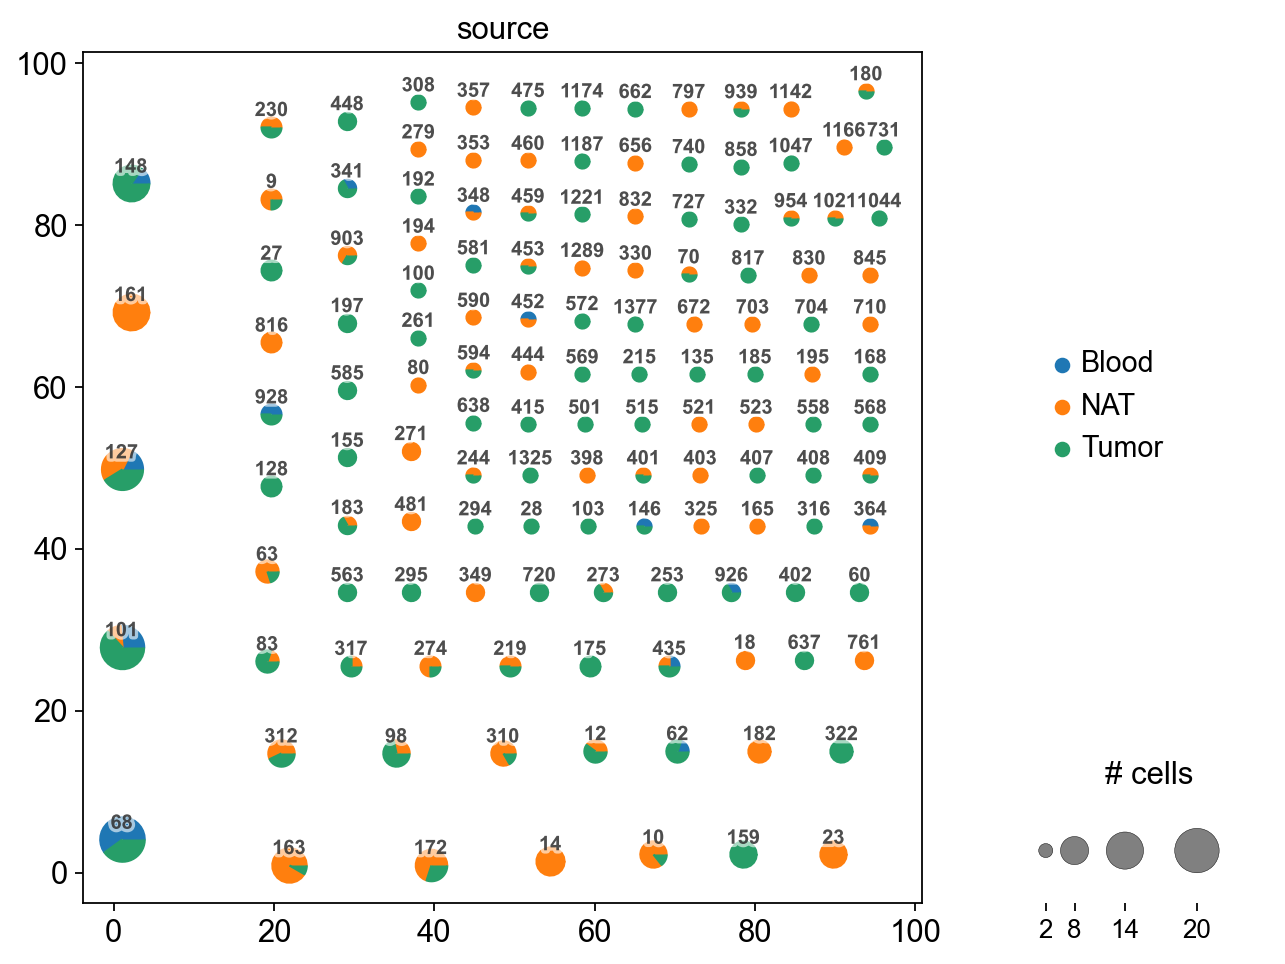

In [22]:
ir.pl.clonotype_network(
    adata, color="source", base_size=20, label_fontsize=9, panel_size=(7, 7)
)

### Re-compute CDR3 neighborhood graph and define clonotype clusters

In [23]:
ir.pp.ir_dist(
    adata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

Computing sequence x sequence distance matrix for VJ sequences.


  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 1/496 [00:53<7:21:29, 53.51s/it]

 20%|██        | 101/496 [00:54<02:31,  2.61it/s]

 20%|██        | 101/496 [01:07<02:31,  2.61it/s]

 30%|███       | 151/496 [01:16<02:21,  2.44it/s]

 51%|█████     | 251/496 [01:17<00:46,  5.23it/s]

 61%|██████    | 301/496 [01:35<00:46,  4.21it/s]

 71%|███████   | 351/496 [01:36<00:25,  5.76it/s]

 81%|████████  | 401/496 [01:36<00:11,  7.93it/s]

 91%|█████████ | 451/496 [01:42<00:05,  8.15it/s]

100%|██████████| 496/496 [01:42<00:00,  4.84it/s]

Computing sequence x sequence distance matrix for VDJ sequences.


  0%|          | 0/496 [00:00<?, ?it/s]

  0%|          | 1/496 [00:41<5:45:14, 41.85s/it]

 10%|█         | 51/496 [00:41<04:18,  1.72it/s] 

 20%|██        | 101/496 [00:42<01:36,  4.10it/s]

 20%|██        | 101/496 [00:54<01:36,  4.10it/s]

 30%|███       | 151/496 [01:01<01:46,  3.23it/s]

 51%|█████     | 251/496 [01:02<00:34,  7.10it/s]

 51%|█████     | 251/496 [01:14<00:34,  7.10it/s]

 61%|██████    | 301/496 [01:22<00:41,  4.67it/s]

 81%|████████  | 401/496 [01:23<00:11,  8.28it/s]

 91%|█████████ | 451/496 [01:28<00:05,  8.45it/s]

100%|██████████| 496/496 [01:28<00:00,  5.59it/s]

In [24]:
ir.tl.define_clonotype_clusters(
    adata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)

Initializing lookup tables. 


Computing clonotype x clonotype distances.


  0%|          | 0/1549 [00:00<?, ?it/s]

  1%|          | 10/1549 [00:00<00:16, 95.83it/s]

  1%|▏         | 21/1549 [00:00<00:14, 103.71it/s]

  2%|▏         | 32/1549 [00:00<00:14, 103.63it/s]

  3%|▎         | 44/1549 [00:00<00:13, 109.06it/s]

  4%|▎         | 56/1549 [00:00<00:13, 109.90it/s]

  4%|▍         | 67/1549 [00:00<00:13, 106.36it/s]

  5%|▌         | 78/1549 [00:00<00:14, 101.54it/s]

  6%|▌         | 89/1549 [00:00<00:14, 102.13it/s]

  6%|▋         | 100/1549 [00:00<00:14, 100.97it/s]

  7%|▋         | 111/1549 [00:01<00:14, 98.02it/s] 

  8%|▊         | 121/1549 [00:01<00:14, 95.93it/s]

  9%|▊         | 132/1549 [00:01<00:14, 97.93it/s]

  9%|▉         | 142/1549 [00:01<00:14, 94.53it/s]

 10%|▉         | 152/1549 [00:01<00:14, 94.41it/s]

 10%|█         | 162/1549 [00:01<00:14, 94.37it/s]

 11%|█         | 172/1549 [00:01<00:14, 95.11it/s]

 12%|█▏        | 183/1549 [00:01<00:13, 98.76it/s]

 13%|█▎        | 195/1549 [00:01<00:13, 104.03it/s]

 13%|█▎        | 206/1549 [00:02<00:13, 102.21it/s]

 14%|█▍        | 217/1549 [00:02<00:13, 99.41it/s] 

 15%|█▍        | 227/1549 [00:02<00:13, 99.11it/s]

 15%|█▌        | 237/1549 [00:02<00:13, 94.72it/s]

 16%|█▌        | 247/1549 [00:02<00:13, 94.13it/s]

 17%|█▋        | 257/1549 [00:02<00:13, 93.74it/s]

 17%|█▋        | 267/1549 [00:02<00:13, 95.02it/s]

 18%|█▊        | 277/1549 [00:02<00:13, 95.35it/s]

 19%|█▊        | 287/1549 [00:02<00:13, 95.90it/s]

 19%|█▉        | 298/1549 [00:03<00:12, 99.44it/s]

 20%|█▉        | 309/1549 [00:03<00:12, 101.41it/s]

 21%|██        | 320/1549 [00:03<00:12, 99.43it/s] 

 21%|██▏       | 331/1549 [00:03<00:12, 99.93it/s]

 22%|██▏       | 342/1549 [00:03<00:12, 100.42it/s]

 23%|██▎       | 353/1549 [00:03<00:11, 101.83it/s]

 23%|██▎       | 364/1549 [00:03<00:11, 102.34it/s]

 24%|██▍       | 375/1549 [00:03<00:11, 101.60it/s]

 25%|██▍       | 387/1549 [00:03<00:11, 104.65it/s]

 26%|██▌       | 398/1549 [00:03<00:11, 102.10it/s]

 26%|██▋       | 409/1549 [00:04<00:11, 102.02it/s]

 27%|██▋       | 421/1549 [00:04<00:10, 105.42it/s]

 28%|██▊       | 433/1549 [00:04<00:10, 107.89it/s]

 29%|██▊       | 444/1549 [00:04<00:10, 106.51it/s]

 29%|██▉       | 456/1549 [00:04<00:10, 107.43it/s]

 30%|███       | 467/1549 [00:04<00:10, 102.49it/s]

 31%|███       | 478/1549 [00:04<00:10, 101.23it/s]

 32%|███▏      | 489/1549 [00:04<00:10, 101.94it/s]

 32%|███▏      | 500/1549 [00:04<00:10, 103.43it/s]

 33%|███▎      | 511/1549 [00:05<00:10, 102.21it/s]

 34%|███▎      | 522/1549 [00:05<00:10, 98.91it/s] 

 34%|███▍      | 533/1549 [00:05<00:10, 100.02it/s]

 35%|███▌      | 544/1549 [00:05<00:09, 100.90it/s]

 36%|███▌      | 555/1549 [00:05<00:09, 101.99it/s]

 37%|███▋      | 567/1549 [00:05<00:09, 105.65it/s]

 37%|███▋      | 578/1549 [00:05<00:09, 103.56it/s]

 38%|███▊      | 589/1549 [00:05<00:09, 100.88it/s]

 39%|███▊      | 600/1549 [00:05<00:09, 102.65it/s]

 39%|███▉      | 611/1549 [00:06<00:09, 98.42it/s] 

 40%|████      | 622/1549 [00:06<00:09, 100.96it/s]

 41%|████      | 633/1549 [00:06<00:08, 102.40it/s]

 42%|████▏     | 644/1549 [00:06<00:08, 103.36it/s]

 42%|████▏     | 655/1549 [00:06<00:08, 99.88it/s] 

 43%|████▎     | 666/1549 [00:06<00:09, 95.95it/s]

 44%|████▍     | 678/1549 [00:06<00:08, 101.33it/s]

 45%|████▍     | 691/1549 [00:06<00:08, 107.22it/s]

 45%|████▌     | 702/1549 [00:06<00:08, 102.36it/s]

 46%|████▌     | 713/1549 [00:07<00:08, 100.65it/s]

 47%|████▋     | 724/1549 [00:07<00:08, 102.17it/s]

 47%|████▋     | 735/1549 [00:07<00:07, 101.77it/s]

 48%|████▊     | 746/1549 [00:07<00:07, 101.53it/s]

 49%|████▉     | 757/1549 [00:07<00:07, 102.02it/s]

 50%|████▉     | 768/1549 [00:07<00:07, 102.07it/s]

 50%|█████     | 779/1549 [00:07<00:07, 103.72it/s]

 51%|█████     | 790/1549 [00:07<00:07, 103.11it/s]

 52%|█████▏    | 801/1549 [00:07<00:07, 103.41it/s]

 52%|█████▏    | 812/1549 [00:08<00:07, 104.96it/s]

 53%|█████▎    | 823/1549 [00:08<00:06, 103.81it/s]

 54%|█████▍    | 834/1549 [00:08<00:07, 101.65it/s]

 55%|█████▍    | 845/1549 [00:08<00:06, 101.40it/s]

 55%|█████▌    | 856/1549 [00:08<00:06, 99.83it/s] 

 56%|█████▌    | 867/1549 [00:08<00:06, 101.54it/s]

 57%|█████▋    | 878/1549 [00:08<00:06, 101.03it/s]

 57%|█████▋    | 889/1549 [00:08<00:06, 99.53it/s] 

 58%|█████▊    | 900/1549 [00:08<00:06, 99.72it/s]

 59%|█████▉    | 911/1549 [00:09<00:06, 101.47it/s]

 60%|█████▉    | 922/1549 [00:09<00:06, 101.85it/s]

 60%|██████    | 933/1549 [00:09<00:06, 101.15it/s]

 61%|██████    | 944/1549 [00:09<00:06, 98.81it/s] 

 62%|██████▏   | 955/1549 [00:09<00:05, 99.21it/s]

 62%|██████▏   | 966/1549 [00:09<00:05, 99.90it/s]

 63%|██████▎   | 977/1549 [00:09<00:05, 102.24it/s]

 64%|██████▍   | 988/1549 [00:09<00:05, 102.39it/s]

 65%|██████▍   | 1000/1549 [00:09<00:05, 106.09it/s]

 65%|██████▌   | 1012/1549 [00:09<00:05, 107.37it/s]

 66%|██████▌   | 1023/1549 [00:10<00:04, 106.49it/s]

 67%|██████▋   | 1034/1549 [00:10<00:04, 103.75it/s]

 67%|██████▋   | 1045/1549 [00:10<00:04, 101.05it/s]

 68%|██████▊   | 1056/1549 [00:10<00:04, 101.22it/s]

 69%|██████▉   | 1067/1549 [00:10<00:04, 103.21it/s]

 70%|██████▉   | 1078/1549 [00:10<00:04, 103.67it/s]

 70%|███████   | 1089/1549 [00:10<00:04, 103.88it/s]

 71%|███████   | 1100/1549 [00:10<00:04, 103.57it/s]

 72%|███████▏  | 1111/1549 [00:10<00:04, 104.50it/s]

 72%|███████▏  | 1122/1549 [00:11<00:04, 104.76it/s]

 73%|███████▎  | 1133/1549 [00:11<00:03, 105.88it/s]

 74%|███████▍  | 1144/1549 [00:11<00:03, 106.81it/s]

 75%|███████▍  | 1155/1549 [00:11<00:03, 106.45it/s]

 75%|███████▌  | 1166/1549 [00:11<00:03, 103.21it/s]

 76%|███████▌  | 1177/1549 [00:11<00:04, 90.88it/s] 

 77%|███████▋  | 1187/1549 [00:11<00:03, 91.45it/s]

 77%|███████▋  | 1197/1549 [00:11<00:03, 89.07it/s]

 78%|███████▊  | 1207/1549 [00:11<00:03, 91.66it/s]

 79%|███████▊  | 1218/1549 [00:12<00:03, 95.12it/s]

 79%|███████▉  | 1228/1549 [00:12<00:03, 94.87it/s]

 80%|███████▉  | 1238/1549 [00:12<00:03, 95.83it/s]

 81%|████████  | 1248/1549 [00:12<00:03, 95.98it/s]

 81%|████████▏ | 1259/1549 [00:12<00:02, 98.36it/s]

 82%|████████▏ | 1271/1549 [00:12<00:02, 103.07it/s]

 83%|████████▎ | 1282/1549 [00:12<00:02, 103.68it/s]

 83%|████████▎ | 1293/1549 [00:12<00:02, 102.39it/s]

 84%|████████▍ | 1304/1549 [00:12<00:02, 102.13it/s]

 85%|████████▍ | 1315/1549 [00:13<00:02, 99.76it/s] 

 86%|████████▌ | 1326/1549 [00:13<00:02, 101.05it/s]

 86%|████████▋ | 1337/1549 [00:13<00:02, 98.37it/s] 

 87%|████████▋ | 1348/1549 [00:13<00:01, 100.51it/s]

 88%|████████▊ | 1360/1549 [00:13<00:01, 103.88it/s]

 89%|████████▊ | 1371/1549 [00:13<00:01, 103.56it/s]

 89%|████████▉ | 1382/1549 [00:13<00:01, 102.57it/s]

 90%|████████▉ | 1393/1549 [00:13<00:01, 98.02it/s] 

 91%|█████████ | 1403/1549 [00:13<00:01, 98.16it/s]

 91%|█████████ | 1413/1549 [00:14<00:01, 97.49it/s]

 92%|█████████▏| 1424/1549 [00:14<00:01, 100.00it/s]

 93%|█████████▎| 1436/1549 [00:14<00:01, 103.74it/s]

 93%|█████████▎| 1447/1549 [00:14<00:00, 103.07it/s]

 94%|█████████▍| 1458/1549 [00:14<00:00, 102.18it/s]

 95%|█████████▍| 1469/1549 [00:14<00:00, 102.78it/s]

 96%|█████████▌| 1480/1549 [00:14<00:00, 102.49it/s]

 96%|█████████▋| 1491/1549 [00:14<00:00, 100.80it/s]

 97%|█████████▋| 1502/1549 [00:14<00:00, 99.43it/s] 

 98%|█████████▊| 1514/1549 [00:14<00:00, 103.03it/s]

 98%|█████████▊| 1525/1549 [00:15<00:00, 101.51it/s]

 99%|█████████▉| 1536/1549 [00:15<00:00, 101.47it/s]

100%|█████████▉| 1548/1549 [00:15<00:00, 104.11it/s]

100%|██████████| 1549/1549 [00:15<00:00, 101.04it/s]

Stored clonal assignments in `adata.obs["cc_aa_alignment"]`.


In [25]:
ir.tl.clonotype_network(adata, min_cells=3, sequence="aa", metric="alignment")

Compared to the previous plot, we observere several connected dots. 
Each fully connected subnetwork represents a "clonotype cluster", each dot 
still represents cells with identical receptor configurations.

The dots are colored by patient. We observe, that for instance, clonotypes `101` and `68` (left top and bottom) are *private*, i.e. they contain cells from a single patient only. On the other hand, clonotype `159` (left middle) is 
*public*, i.e. it is shared across patients *Lung1* and *Lung3*. 

<AxesSubplot:>

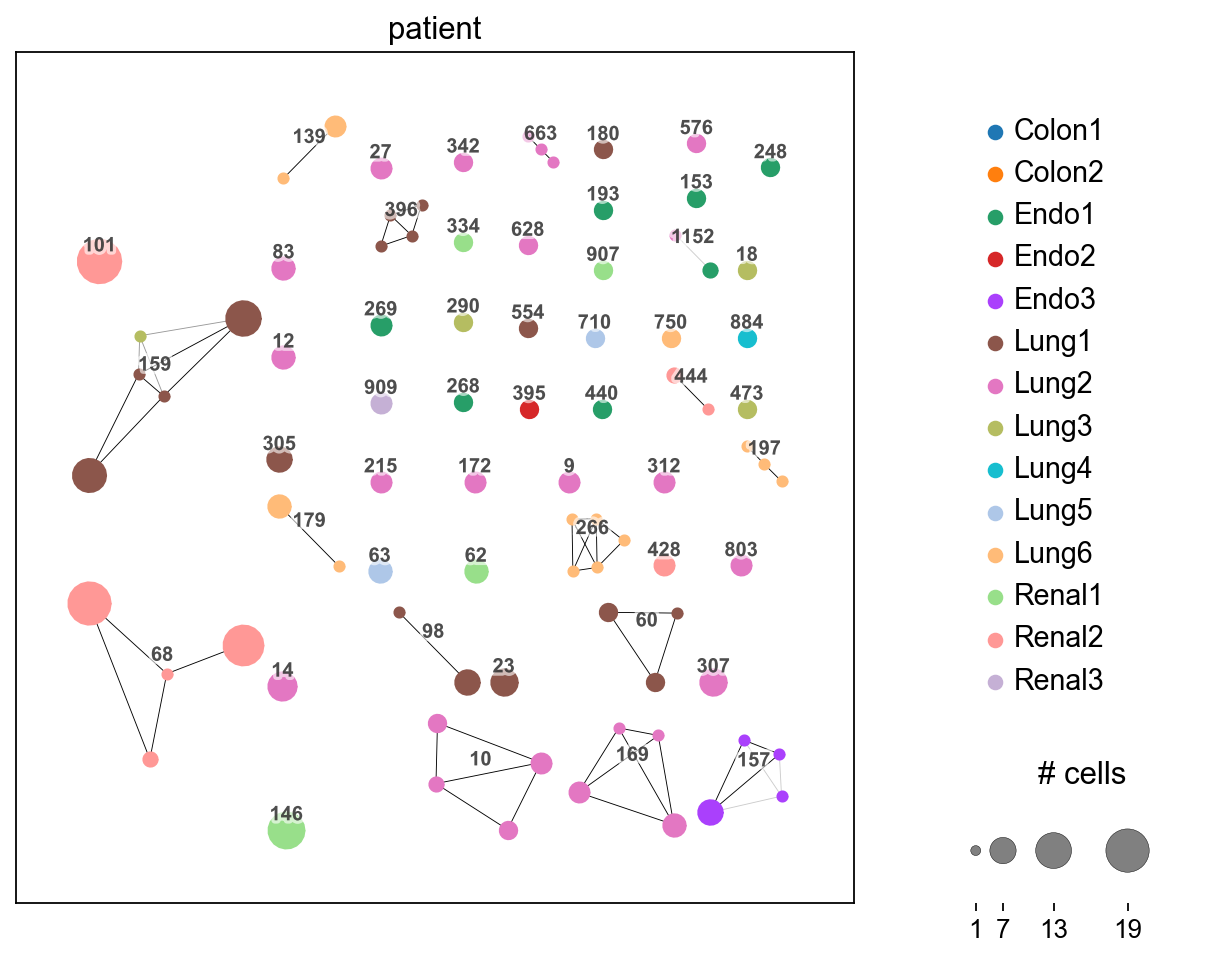

In [26]:
ir.pl.clonotype_network(
    adata, color="patient", label_fontsize=9, panel_size=(7, 7), base_size=20
)

We can now extract information (e.g. CDR3-sequences) from a specific clonotype cluster by subsetting `AnnData`.
When extracting the CDR3 sequences of clonotype cluster `159`, we retreive five different receptor configurations with different numbers of cells, corresponding to the five points in the graph. 

In [27]:
adata.obs.loc[adata.obs["cc_aa_alignment"] == "159", :].groupby(
    [
        "IR_VJ_1_junction_aa",
        "IR_VJ_2_junction_aa",
        "IR_VDJ_1_junction_aa",
        "IR_VDJ_2_junction_aa",
        "receptor_subtype",
    ],
    observed=True,
).size().reset_index(name="n_cells")

IR_VJ_1_junction_aa IR_VJ_2_junction_aa IR_VDJ_1_junction_aa  \
0       CAGKSGNTGKLIF                None        CASSYQGATEAFF   
1       CAGKSGNTGKLIF     CATDPRRSTGNQFYF        CASSYQGATEAFF   
2     CATDPRRSTGNQFYF                None        CASSYQGATEAFF   
3     CATDPRRSTGNQFYF       CAGKSGNTGKLIF        CASSYQGATEAFF   
4       CAGKAGNTGKLIF                None        CASSYQGSTEAFF   

  IR_VDJ_2_junction_aa receptor_subtype  n_cells  
0                 None          TRA+TRB       12  
1                 None          TRA+TRB        1  
2                 None          TRA+TRB       11  
3                 None          TRA+TRB        1  
4                 None          TRA+TRB        1

### Including the V-gene in clonotype definition

In [28]:
ir.tl.define_clonotype_clusters(
    adata,
    sequence="aa",
    metric="alignment",
    receptor_arms="all",
    dual_ir="any",
    same_v_gene=True,
    key_added="cc_aa_alignment_same_v",
)

Initializing lookup tables. 


Computing clonotype x clonotype distances.


  0%|          | 0/1549 [00:00<?, ?it/s]

  1%|          | 9/1549 [00:00<00:18, 82.55it/s]

  1%|▏         | 20/1549 [00:00<00:16, 94.86it/s]

  2%|▏         | 30/1549 [00:00<00:16, 90.78it/s]

  3%|▎         | 40/1549 [00:00<00:16, 93.34it/s]

  3%|▎         | 50/1549 [00:00<00:15, 94.50it/s]

  4%|▍         | 60/1549 [00:00<00:16, 90.98it/s]

  5%|▍         | 70/1549 [00:00<00:16, 90.60it/s]

  5%|▌         | 80/1549 [00:00<00:16, 91.03it/s]

  6%|▌         | 90/1549 [00:00<00:15, 91.32it/s]

  6%|▋         | 100/1549 [00:01<00:16, 88.15it/s]

  7%|▋         | 109/1549 [00:01<00:16, 87.00it/s]

  8%|▊         | 119/1549 [00:01<00:15, 89.44it/s]

  8%|▊         | 128/1549 [00:01<00:15, 89.09it/s]

  9%|▉         | 138/1549 [00:01<00:15, 90.98it/s]

 10%|▉         | 148/1549 [00:01<00:15, 89.70it/s]

 10%|█         | 158/1549 [00:01<00:15, 92.36it/s]

 11%|█         | 168/1549 [00:01<00:15, 91.61it/s]

 11%|█▏        | 178/1549 [00:01<00:15, 90.92it/s]

 12%|█▏        | 188/1549 [00:02<00:14, 92.36it/s]

 13%|█▎        | 198/1549 [00:02<00:14, 91.50it/s]

 13%|█▎        | 208/1549 [00:02<00:14, 91.74it/s]

 14%|█▍        | 218/1549 [00:02<00:14, 92.28it/s]

 15%|█▍        | 228/1549 [00:02<00:14, 94.02it/s]

 15%|█▌        | 238/1549 [00:02<00:15, 86.57it/s]

 16%|█▌        | 248/1549 [00:02<00:14, 89.24it/s]

 17%|█▋        | 258/1549 [00:02<00:15, 82.20it/s]

 17%|█▋        | 267/1549 [00:02<00:15, 83.15it/s]

 18%|█▊        | 277/1549 [00:03<00:14, 86.05it/s]

 18%|█▊        | 286/1549 [00:03<00:14, 85.93it/s]

 19%|█▉        | 295/1549 [00:03<00:14, 86.17it/s]

 20%|█▉        | 305/1549 [00:03<00:14, 88.85it/s]

 20%|██        | 315/1549 [00:03<00:13, 90.18it/s]

 21%|██        | 325/1549 [00:03<00:13, 92.20it/s]

 22%|██▏       | 335/1549 [00:03<00:13, 93.02it/s]

 22%|██▏       | 345/1549 [00:03<00:12, 94.51it/s]

 23%|██▎       | 355/1549 [00:03<00:12, 95.78it/s]

 24%|██▎       | 365/1549 [00:04<00:12, 94.20it/s]

 24%|██▍       | 375/1549 [00:04<00:12, 91.55it/s]

 25%|██▍       | 386/1549 [00:04<00:12, 95.52it/s]

 26%|██▌       | 396/1549 [00:04<00:12, 92.83it/s]

 26%|██▋       | 407/1549 [00:04<00:11, 95.80it/s]

 27%|██▋       | 417/1549 [00:04<00:11, 95.45it/s]

 28%|██▊       | 427/1549 [00:04<00:11, 96.06it/s]

 28%|██▊       | 437/1549 [00:04<00:11, 93.67it/s]

 29%|██▉       | 447/1549 [00:04<00:11, 93.92it/s]

 30%|██▉       | 457/1549 [00:05<00:11, 91.53it/s]

 30%|███       | 467/1549 [00:05<00:12, 89.36it/s]

 31%|███       | 476/1549 [00:05<00:12, 87.90it/s]

 31%|███▏      | 485/1549 [00:05<00:12, 86.62it/s]

 32%|███▏      | 496/1549 [00:05<00:11, 91.57it/s]

 33%|███▎      | 506/1549 [00:05<00:11, 91.56it/s]

 33%|███▎      | 516/1549 [00:05<00:11, 89.31it/s]

 34%|███▍      | 525/1549 [00:05<00:11, 88.03it/s]

 35%|███▍      | 535/1549 [00:05<00:11, 90.81it/s]

 35%|███▌      | 545/1549 [00:05<00:10, 92.90it/s]

 36%|███▌      | 556/1549 [00:06<00:10, 96.20it/s]

 37%|███▋      | 566/1549 [00:06<00:10, 97.13it/s]

 37%|███▋      | 576/1549 [00:06<00:10, 95.74it/s]

 38%|███▊      | 586/1549 [00:06<00:10, 93.23it/s]

 38%|███▊      | 596/1549 [00:06<00:10, 93.55it/s]

 39%|███▉      | 606/1549 [00:06<00:09, 94.39it/s]

 40%|███▉      | 616/1549 [00:06<00:10, 89.96it/s]

 40%|████      | 626/1549 [00:06<00:10, 91.82it/s]

 41%|████      | 636/1549 [00:06<00:09, 93.53it/s]

 42%|████▏     | 647/1549 [00:07<00:09, 95.55it/s]

 42%|████▏     | 657/1549 [00:07<00:09, 91.28it/s]

 43%|████▎     | 667/1549 [00:07<00:10, 87.42it/s]

 44%|████▎     | 676/1549 [00:07<00:09, 87.72it/s]

 44%|████▍     | 687/1549 [00:07<00:09, 91.44it/s]

 45%|████▍     | 697/1549 [00:07<00:09, 89.87it/s]

 46%|████▌     | 707/1549 [00:07<00:09, 90.43it/s]

 46%|████▋     | 717/1549 [00:07<00:09, 90.03it/s]

 47%|████▋     | 727/1549 [00:07<00:09, 91.24it/s]

 48%|████▊     | 737/1549 [00:08<00:08, 90.52it/s]

 48%|████▊     | 747/1549 [00:08<00:08, 91.96it/s]

 49%|████▉     | 757/1549 [00:08<00:08, 91.27it/s]

 50%|████▉     | 767/1549 [00:08<00:08, 89.70it/s]

 50%|█████     | 777/1549 [00:08<00:08, 92.08it/s]

 51%|█████     | 787/1549 [00:08<00:08, 92.64it/s]

 51%|█████▏    | 797/1549 [00:08<00:08, 93.95it/s]

 52%|█████▏    | 808/1549 [00:08<00:07, 97.06it/s]

 53%|█████▎    | 818/1549 [00:08<00:07, 96.68it/s]

 53%|█████▎    | 828/1549 [00:09<00:07, 94.87it/s]

 54%|█████▍    | 838/1549 [00:09<00:07, 94.63it/s]

 55%|█████▍    | 848/1549 [00:09<00:07, 92.92it/s]

 55%|█████▌    | 858/1549 [00:09<00:07, 92.44it/s]

 56%|█████▌    | 869/1549 [00:09<00:07, 94.48it/s]

 57%|█████▋    | 879/1549 [00:09<00:07, 94.71it/s]

 57%|█████▋    | 889/1549 [00:09<00:07, 92.13it/s]

 58%|█████▊    | 899/1549 [00:09<00:07, 91.76it/s]

 59%|█████▊    | 909/1549 [00:09<00:07, 90.71it/s]

 59%|█████▉    | 919/1549 [00:10<00:06, 92.22it/s]

 60%|█████▉    | 929/1549 [00:10<00:06, 89.96it/s]

 61%|██████    | 939/1549 [00:10<00:06, 88.67it/s]

 61%|██████▏   | 950/1549 [00:10<00:06, 92.81it/s]

 62%|██████▏   | 960/1549 [00:10<00:06, 88.95it/s]

 63%|██████▎   | 970/1549 [00:10<00:06, 91.35it/s]

 63%|██████▎   | 980/1549 [00:10<00:06, 92.54it/s]

 64%|██████▍   | 991/1549 [00:10<00:05, 95.82it/s]

 65%|██████▍   | 1002/1549 [00:10<00:05, 97.60it/s]

 65%|██████▌   | 1013/1549 [00:11<00:05, 99.22it/s]

 66%|██████▌   | 1023/1549 [00:11<00:05, 93.51it/s]

 67%|██████▋   | 1033/1549 [00:11<00:05, 93.45it/s]

 67%|██████▋   | 1043/1549 [00:11<00:05, 91.00it/s]

 68%|██████▊   | 1053/1549 [00:11<00:05, 91.44it/s]

 69%|██████▊   | 1063/1549 [00:11<00:05, 92.91it/s]

 69%|██████▉   | 1073/1549 [00:11<00:05, 93.01it/s]

 70%|██████▉   | 1084/1549 [00:11<00:04, 97.30it/s]

 71%|███████   | 1094/1549 [00:11<00:04, 96.66it/s]

 71%|███████▏  | 1104/1549 [00:12<00:04, 94.79it/s]

 72%|███████▏  | 1114/1549 [00:12<00:04, 95.05it/s]

 73%|███████▎  | 1124/1549 [00:12<00:04, 94.05it/s]

 73%|███████▎  | 1134/1549 [00:12<00:04, 93.38it/s]

 74%|███████▍  | 1144/1549 [00:12<00:04, 94.67it/s]

 74%|███████▍  | 1154/1549 [00:12<00:04, 94.62it/s]

 75%|███████▌  | 1164/1549 [00:12<00:04, 92.17it/s]

 76%|███████▌  | 1174/1549 [00:12<00:04, 90.29it/s]

 76%|███████▋  | 1184/1549 [00:12<00:04, 84.48it/s]

 77%|███████▋  | 1193/1549 [00:13<00:04, 80.17it/s]

 78%|███████▊  | 1203/1549 [00:13<00:04, 83.08it/s]

 78%|███████▊  | 1213/1549 [00:13<00:03, 86.99it/s]

 79%|███████▉  | 1222/1549 [00:13<00:03, 86.57it/s]

 79%|███████▉  | 1231/1549 [00:13<00:03, 86.95it/s]

 80%|████████  | 1241/1549 [00:13<00:03, 88.50it/s]

 81%|████████  | 1250/1549 [00:13<00:03, 80.80it/s]

 81%|████████▏ | 1259/1549 [00:13<00:03, 75.89it/s]

 82%|████████▏ | 1268/1549 [00:13<00:03, 79.46it/s]

 83%|████████▎ | 1278/1549 [00:14<00:03, 83.82it/s]

 83%|████████▎ | 1287/1549 [00:14<00:03, 85.07it/s]

 84%|████████▎ | 1296/1549 [00:14<00:03, 83.66it/s]

 84%|████████▍ | 1305/1549 [00:14<00:02, 82.92it/s]

 85%|████████▍ | 1314/1549 [00:14<00:02, 81.33it/s]

 85%|████████▌ | 1324/1549 [00:14<00:02, 86.23it/s]

 86%|████████▌ | 1333/1549 [00:14<00:02, 85.72it/s]

 87%|████████▋ | 1342/1549 [00:14<00:02, 86.53it/s]

 87%|████████▋ | 1352/1549 [00:14<00:02, 88.45it/s]

 88%|████████▊ | 1361/1549 [00:15<00:02, 88.67it/s]

 88%|████████▊ | 1370/1549 [00:15<00:02, 86.83it/s]

 89%|████████▉ | 1379/1549 [00:15<00:01, 86.64it/s]

 90%|████████▉ | 1389/1549 [00:15<00:01, 88.86it/s]

 90%|█████████ | 1398/1549 [00:15<00:01, 88.30it/s]

 91%|█████████ | 1408/1549 [00:15<00:01, 89.83it/s]

 92%|█████████▏| 1418/1549 [00:15<00:01, 91.50it/s]

 92%|█████████▏| 1429/1549 [00:15<00:01, 94.88it/s]

 93%|█████████▎| 1439/1549 [00:15<00:01, 96.35it/s]

 94%|█████████▎| 1449/1549 [00:15<00:01, 97.22it/s]

 94%|█████████▍| 1459/1549 [00:16<00:00, 94.23it/s]

 95%|█████████▍| 1469/1549 [00:16<00:00, 94.88it/s]

 95%|█████████▌| 1479/1549 [00:16<00:00, 96.29it/s]

 96%|█████████▌| 1489/1549 [00:16<00:00, 97.00it/s]

 97%|█████████▋| 1499/1549 [00:16<00:00, 97.63it/s]

 97%|█████████▋| 1509/1549 [00:16<00:00, 97.23it/s]

 98%|█████████▊| 1519/1549 [00:16<00:00, 95.64it/s]

 99%|█████████▊| 1529/1549 [00:16<00:00, 94.24it/s]

 99%|█████████▉| 1539/1549 [00:16<00:00, 95.02it/s]

100%|██████████| 1549/1549 [00:16<00:00, 91.20it/s]

Stored clonal assignments in `adata.obs["cc_aa_alignment_same_v"]`.


In [29]:
# find clonotypes with more than one `clonotype_same_v`
ct_different_v = adata.obs.groupby("cc_aa_alignment").apply(
    lambda x: x["cc_aa_alignment_same_v"].nunique() > 1
)
ct_different_v = ct_different_v[ct_different_v].index.values.tolist()
ct_different_v

['280', '765']

Here, we see that the clonotype clusters `280` and `765` get split into `(280, 788)` and `(765, 1071)`, respectively, when the `same_v_gene` flag is set. 

In [30]:
adata.obs.loc[
    adata.obs["cc_aa_alignment"].isin(ct_different_v),
    [
        "cc_aa_alignment",
        "cc_aa_alignment_same_v",
        "IR_VJ_1_v_call",
        "IR_VDJ_1_v_call",
    ],
].sort_values("cc_aa_alignment").drop_duplicates().reset_index(drop=True)

cc_aa_alignment cc_aa_alignment_same_v IR_VJ_1_v_call IR_VDJ_1_v_call
0             280                    280        TRAV8-6         TRBV6-6
1             280                    788        TRAV8-3           TRBV9
2             765                    765         TRAV21         TRBV6-6
3             765                   1071         TRAV21         TRBV6-5

## Clonotype analysis

### Clonal expansion

In [31]:
ir.tl.clonal_expansion(adata)

`clonal_expansion` refers to expansion categories, i.e singleton clonotypes, clonotypes with 2 cells and more than 2 cells.
The `clonotype_size` refers to the absolute number of cells in a clonotype.

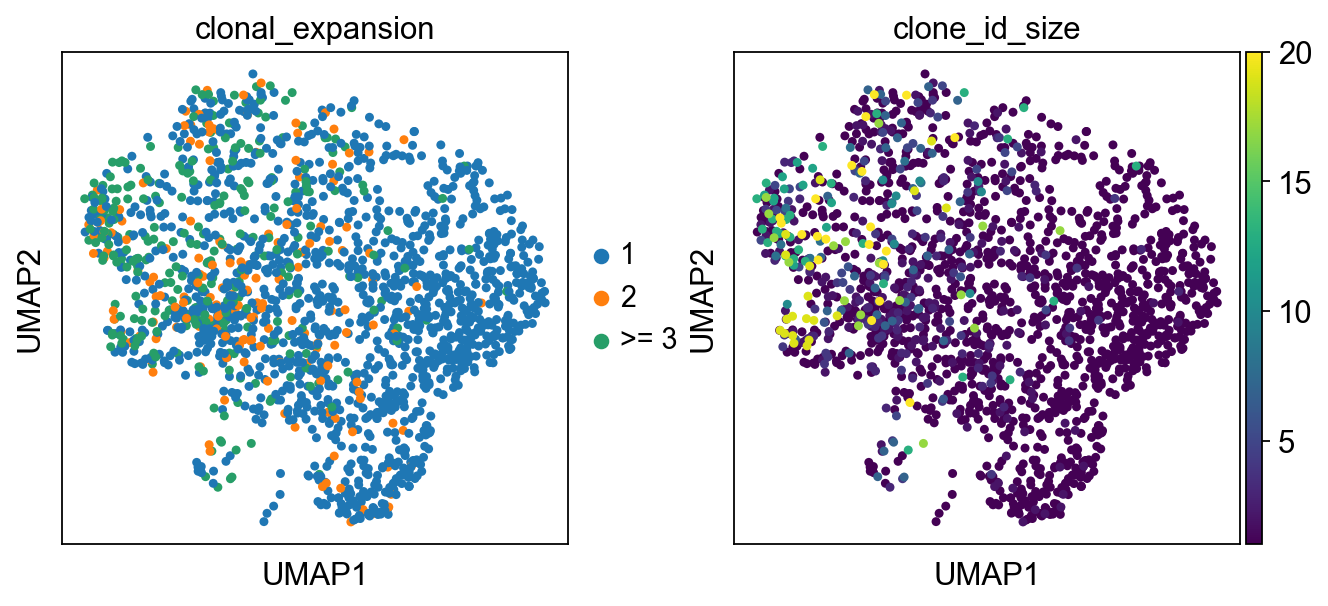

In [32]:
sc.pl.umap(adata, color=["clonal_expansion", "clone_id_size"])

<AxesSubplot:>

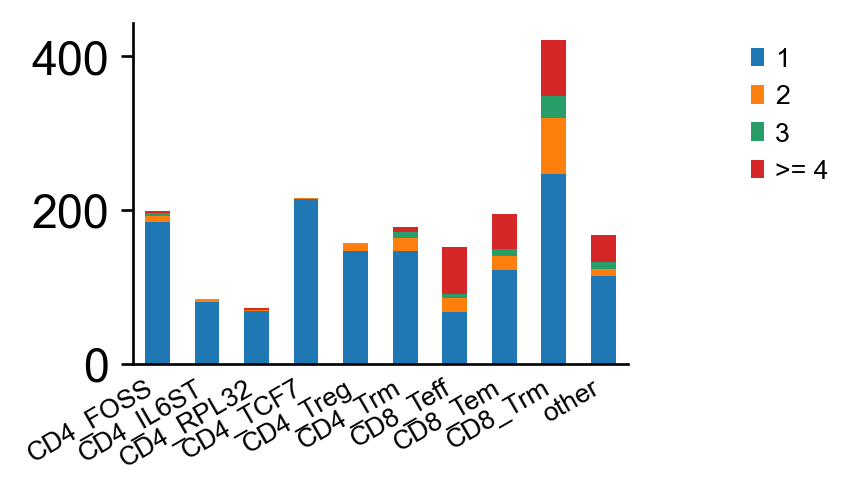

In [33]:
ir.pl.clonal_expansion(adata, groupby="cluster", clip_at=4, normalize=False)

The same plot, normalized to cluster size. Clonal expansion is a sign of positive selection
for a certain, reactive T-cell clone. It, therefore, makes sense that CD8+ effector T-cells
have the largest fraction of expanded clonotypes.

<AxesSubplot:>

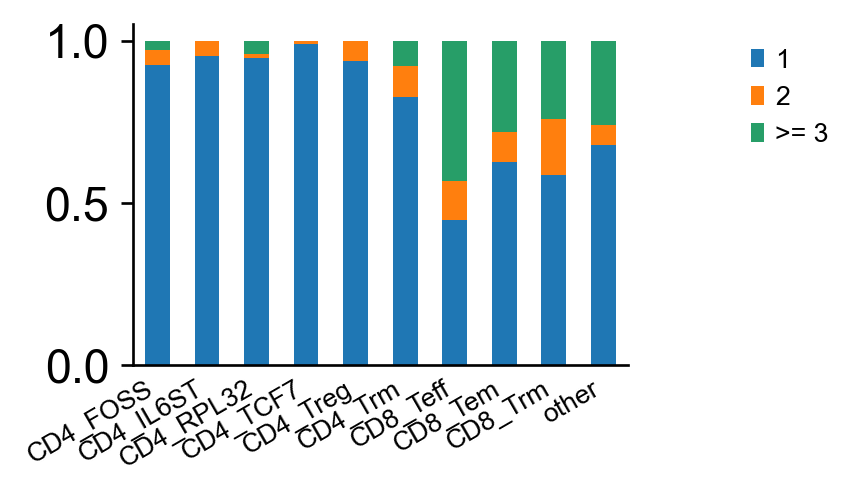

In [34]:
ir.pl.clonal_expansion(adata, "cluster")

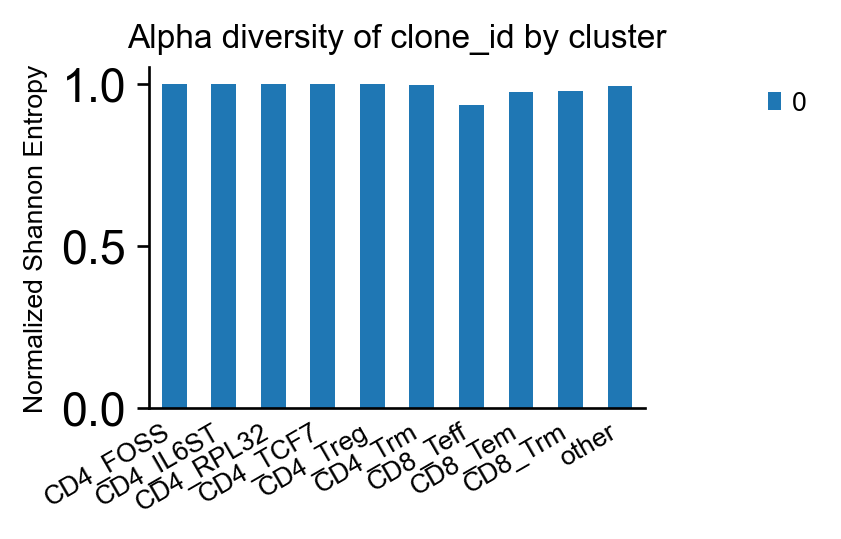

In [35]:
ax = ir.pl.alpha_diversity(
    adata, metric="normalized_shannon_entropy", groupby="cluster"
)

### Clonotype abundance

<AxesSubplot:title={'center':'Number of cells in clone_id by cluster'}, xlabel='clone_id', ylabel='Number of cells'>

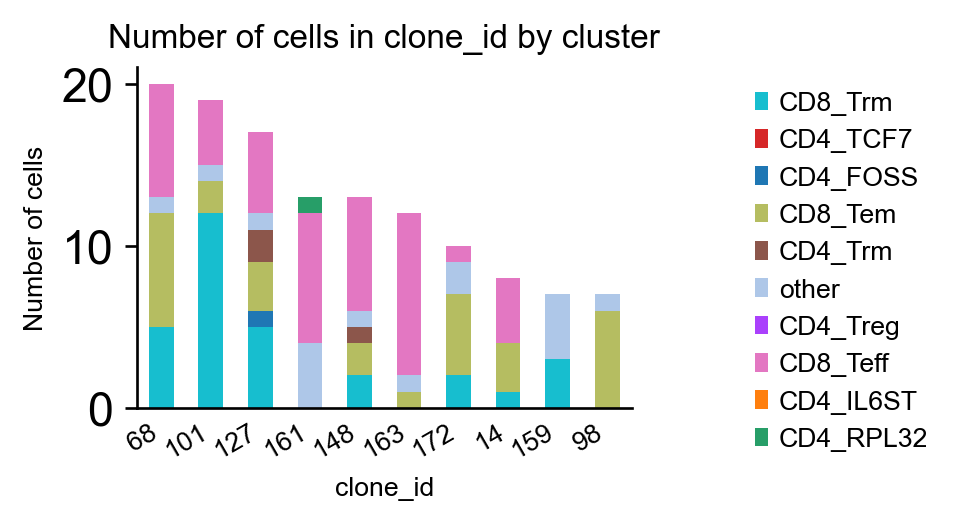

In [36]:
ir.pl.group_abundance(adata, groupby="clone_id", target_col="cluster", max_cols=10)

It might be beneficial to normalize the counts
to the number of cells per sample to mitigate biases due to different sample sizes:

<AxesSubplot:title={'center':'Fraction of cluster in each clone_id'}, xlabel='clone_id', ylabel='Fraction of cells in sample'>

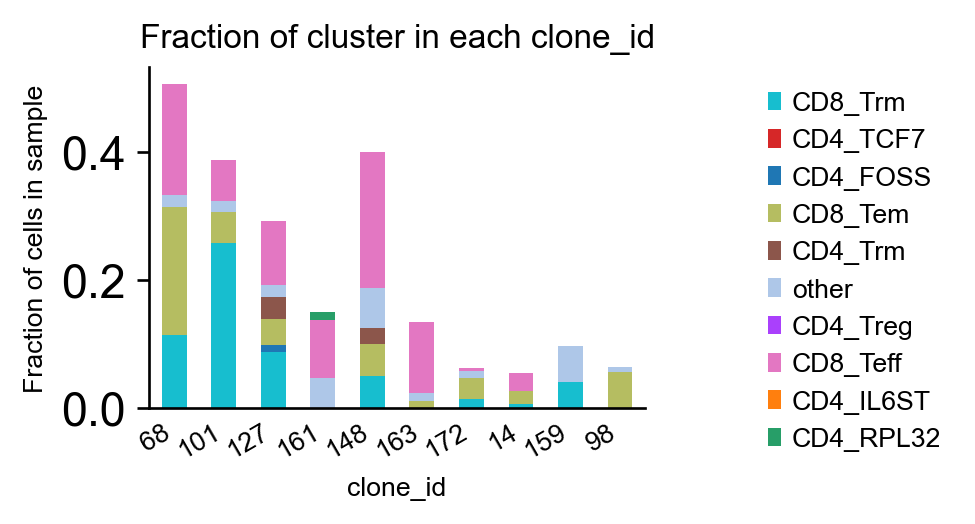

In [37]:
ir.pl.group_abundance(
    adata, groupby="clone_id", target_col="cluster", max_cols=10, normalize="sample"
)

Coloring the bars by patient gives us information about public and private clonotypes:
Some clonotypes are *private*, i.e. specific to a certain tissue,
others are *public*, i.e. they are shared across different tissues.

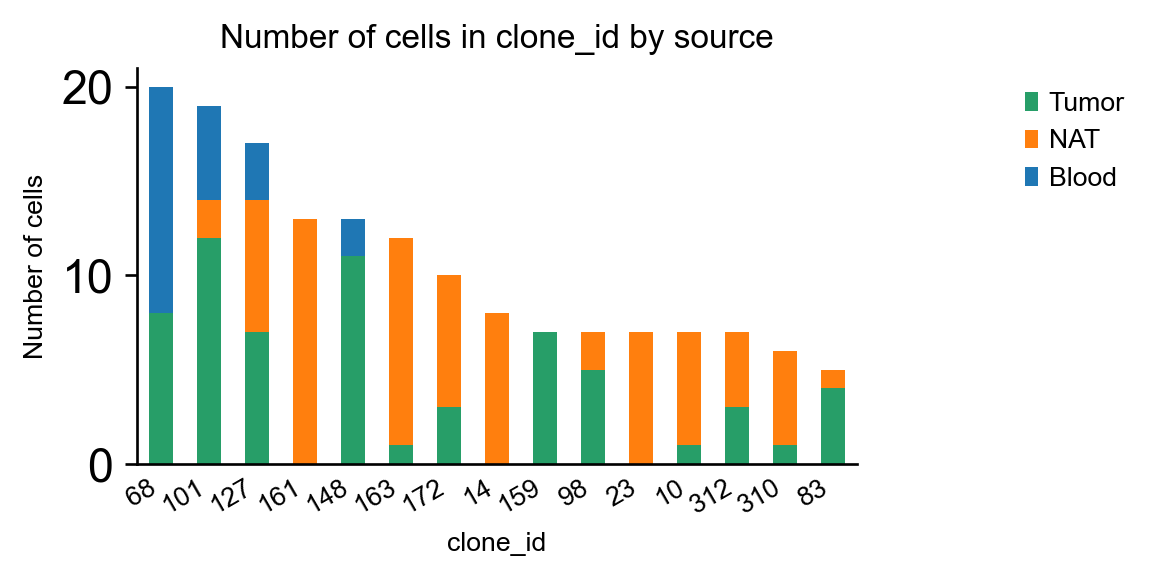

In [38]:
ax = ir.pl.group_abundance(
    adata, groupby="clone_id", target_col="source", max_cols=15, figsize=(5, 3)
)

However, clonotypes that are shared between *patients* are rare:

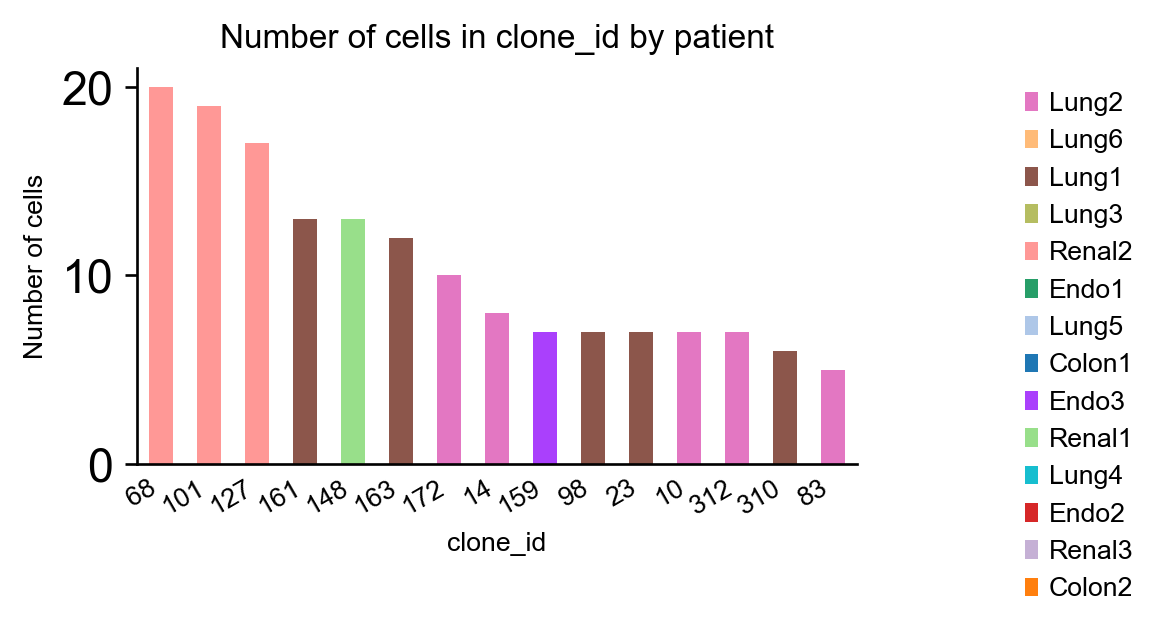

In [39]:
ax = ir.pl.group_abundance(
    adata, groupby="clone_id", target_col="patient", max_cols=15, figsize=(5, 3)
)

## Gene usage

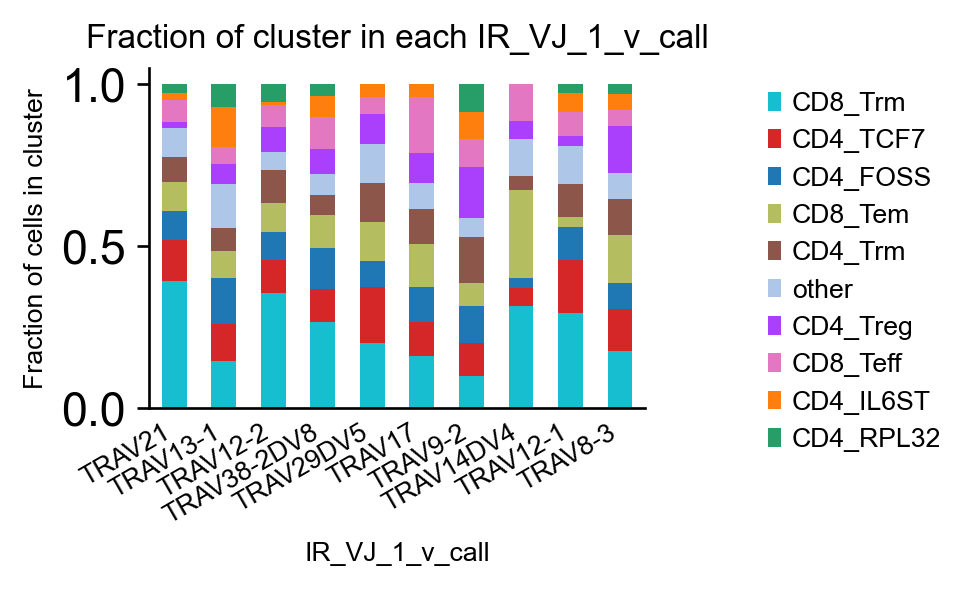

In [40]:
ax = ir.pl.group_abundance(
    adata, groupby="IR_VJ_1_v_call", target_col="cluster", normalize=True, max_cols=10
)

We can pre-select groups by filtering `adata`:

/Users/runner/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


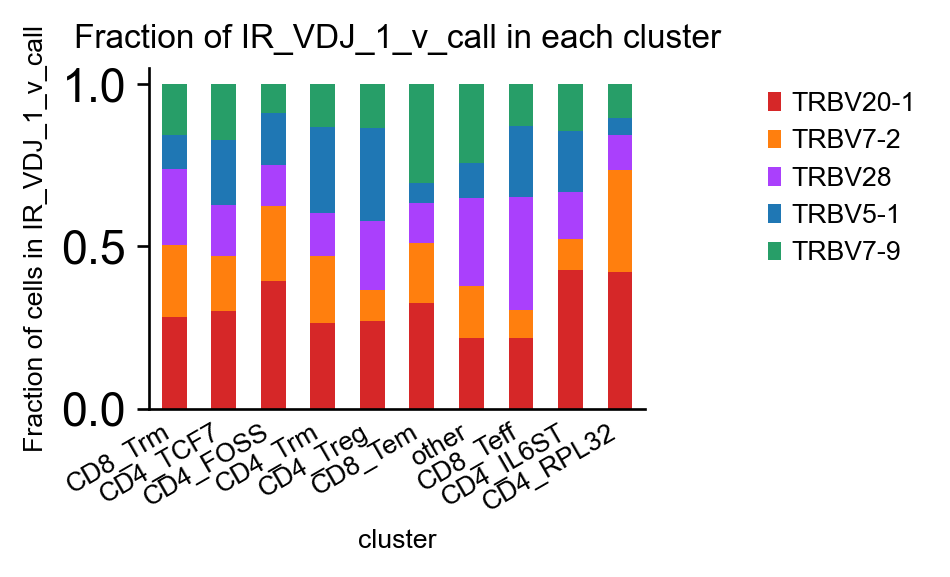

In [41]:
ax = ir.pl.group_abundance(
    adata[
        adata.obs["IR_VDJ_1_v_call"].isin(
            ["TRBV20-1", "TRBV7-2", "TRBV28", "TRBV5-1", "TRBV7-9"]
        ),
        :,
    ],
    groupby="cluster",
    target_col="IR_VDJ_1_v_call",
    normalize=True,
)

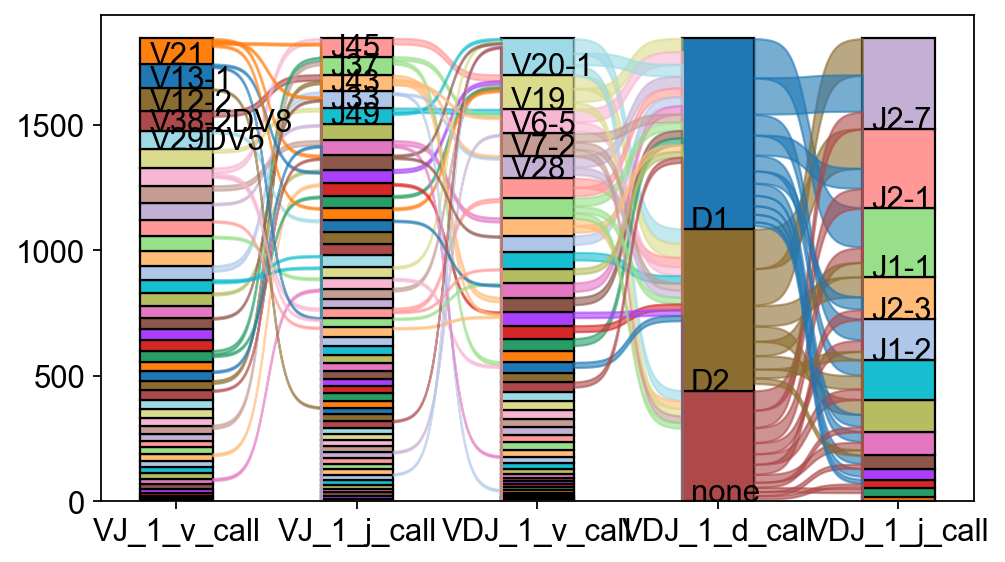

In [42]:
ax = ir.pl.vdj_usage(adata, full_combination=False, max_segments=None, max_ribbons=30)

We can also use this plot to investigate the exact VDJ composition of one (or several) clonotypes:

<AxesSubplot:>

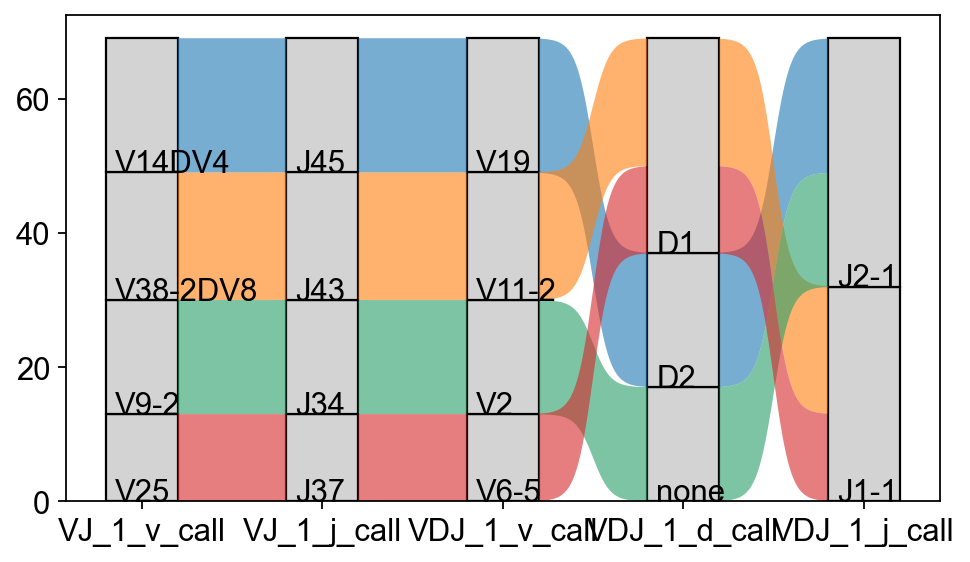

In [43]:
ir.pl.vdj_usage(
    adata[adata.obs["clone_id"].isin(["68", "101", "127", "161"]), :],
    max_ribbons=None,
    max_segments=100,
)

### Spectratype plots

<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_junction_aa by cluster'}, xlabel='IR_VJ_1_junction_aa length', ylabel='Number of cells'>

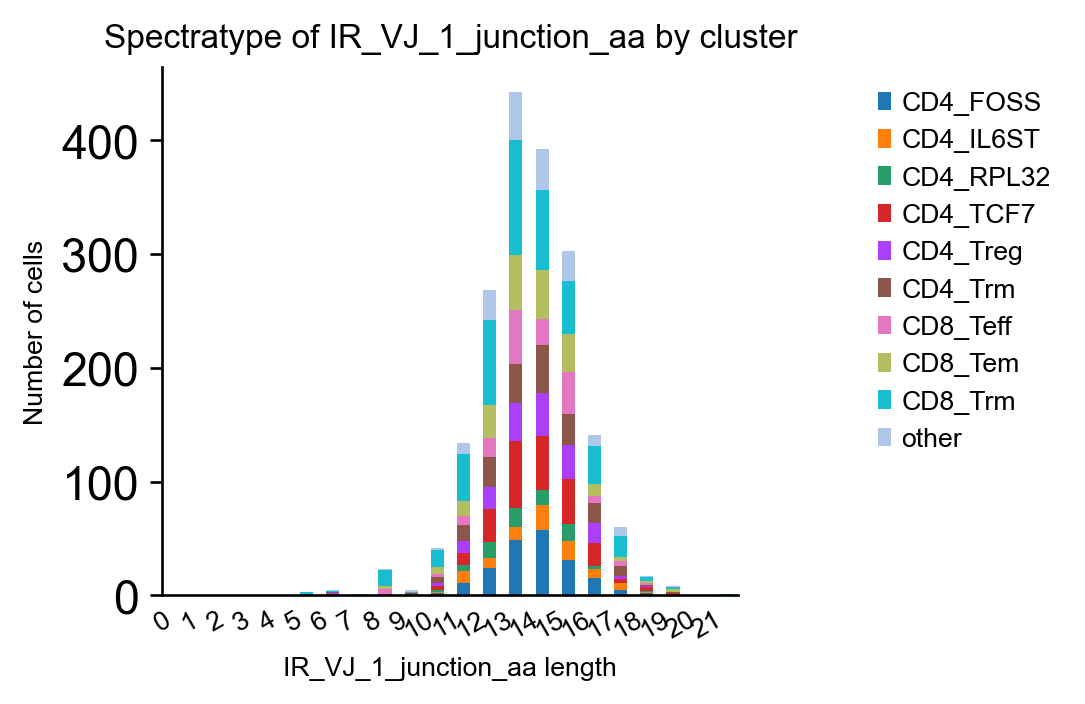

In [44]:
ir.pl.spectratype(adata, color="cluster", viztype="bar", fig_kws={"dpi": 120})

The same chart visualized as "ridge"-plot:

/Users/runner/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/scirpy/pl/base.py:262: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(order)


<AxesSubplot:title={'center':'Spectratype of IR_VJ_1_junction_aa by cluster'}, xlabel='IR_VJ_1_junction_aa length'>

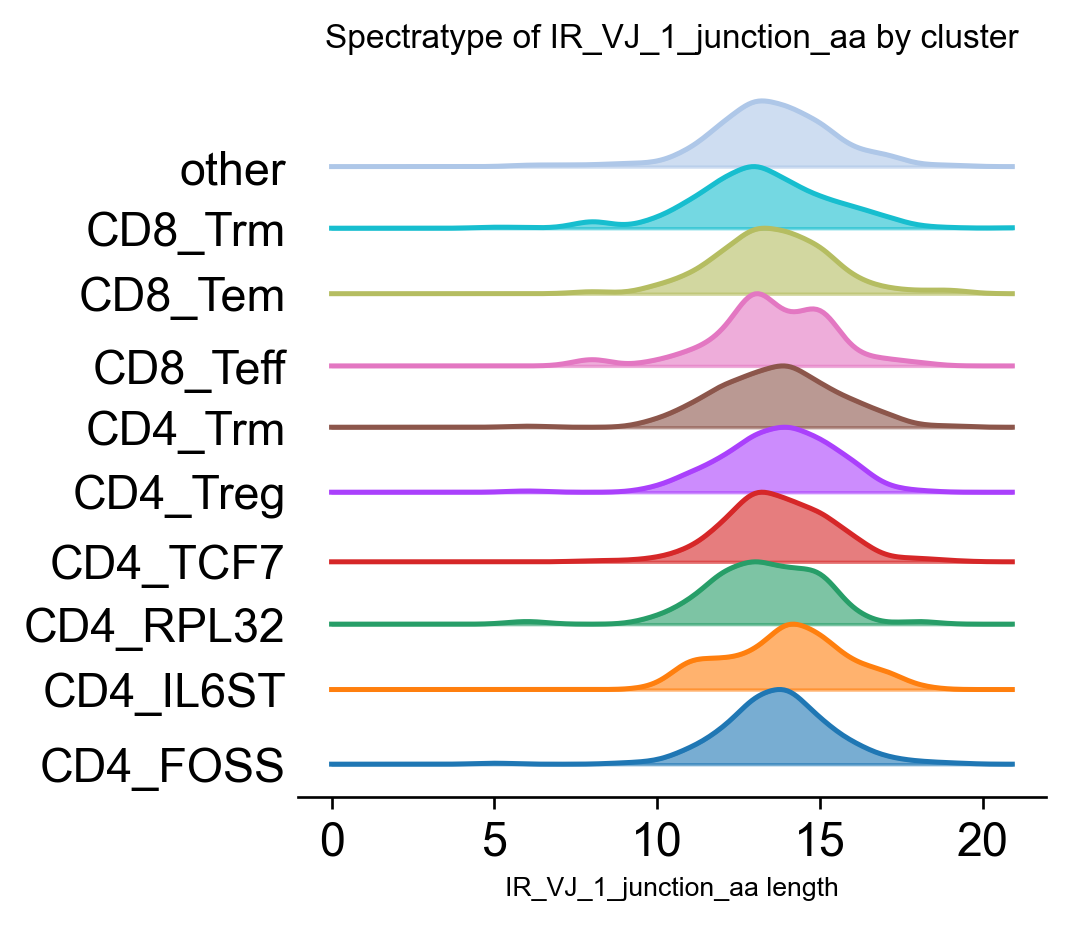

In [45]:
ir.pl.spectratype(
    adata,
    color="cluster",
    viztype="curve",
    curve_layout="shifted",
    fig_kws={"dpi": 120},
    kde_kws={"kde_norm": False},
)

A spectratype-plot by gene usage. To pre-select specific genes, we can simply filter the `adata` object before plotting.

/Users/runner/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


<AxesSubplot:title={'center':'Spectratype of IR_VDJ_1_junction_aa by IR_VDJ_1_v_call'}, xlabel='IR_VDJ_1_junction_aa length', ylabel='Fraction of cells in sample'>

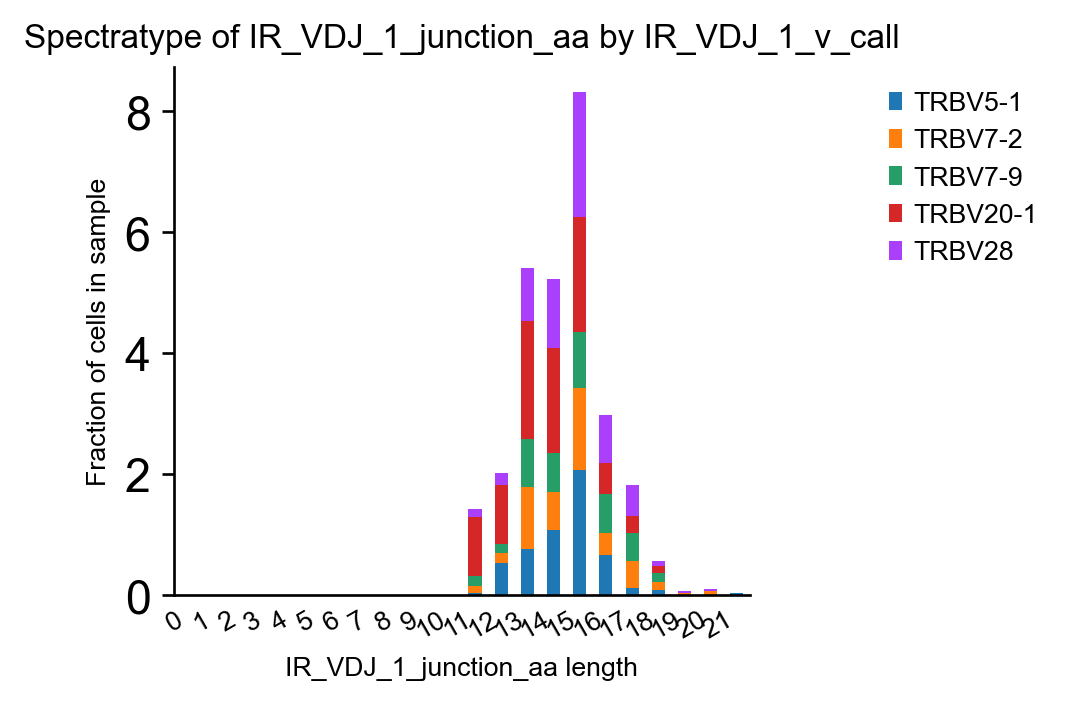

In [46]:
ir.pl.spectratype(
    adata[
        adata.obs["IR_VDJ_1_v_call"].isin(
            ["TRBV20-1", "TRBV7-2", "TRBV28", "TRBV5-1", "TRBV7-9"]
        ),
        :,
    ],
    cdr3_col="IR_VDJ_1_junction_aa",
    color="IR_VDJ_1_v_call",
    normalize="sample",
    fig_kws={"dpi": 120},
)

## Comparing repertoires

### Repertoire simlarity and overlaps

In [47]:
df, dst, lk = ir.tl.repertoire_overlap(adata, "sample", inplace=False)
df.head()

clone_id    0    1    2    3    4    5    6    7    8    9  ...  1516  1517  \
sample                                                      ...               
CN1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
CT1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
CT2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
EN1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
EN2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

clone_id  1518  1519  1520  1521  1522  1523  1524  1525  
sample                                                    
CN1        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
CT1        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
CT2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
EN1        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
EN2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1526 columns]

The distance matrix can be shown as a heatmap, while samples are reordered based on hierarchical clustering.

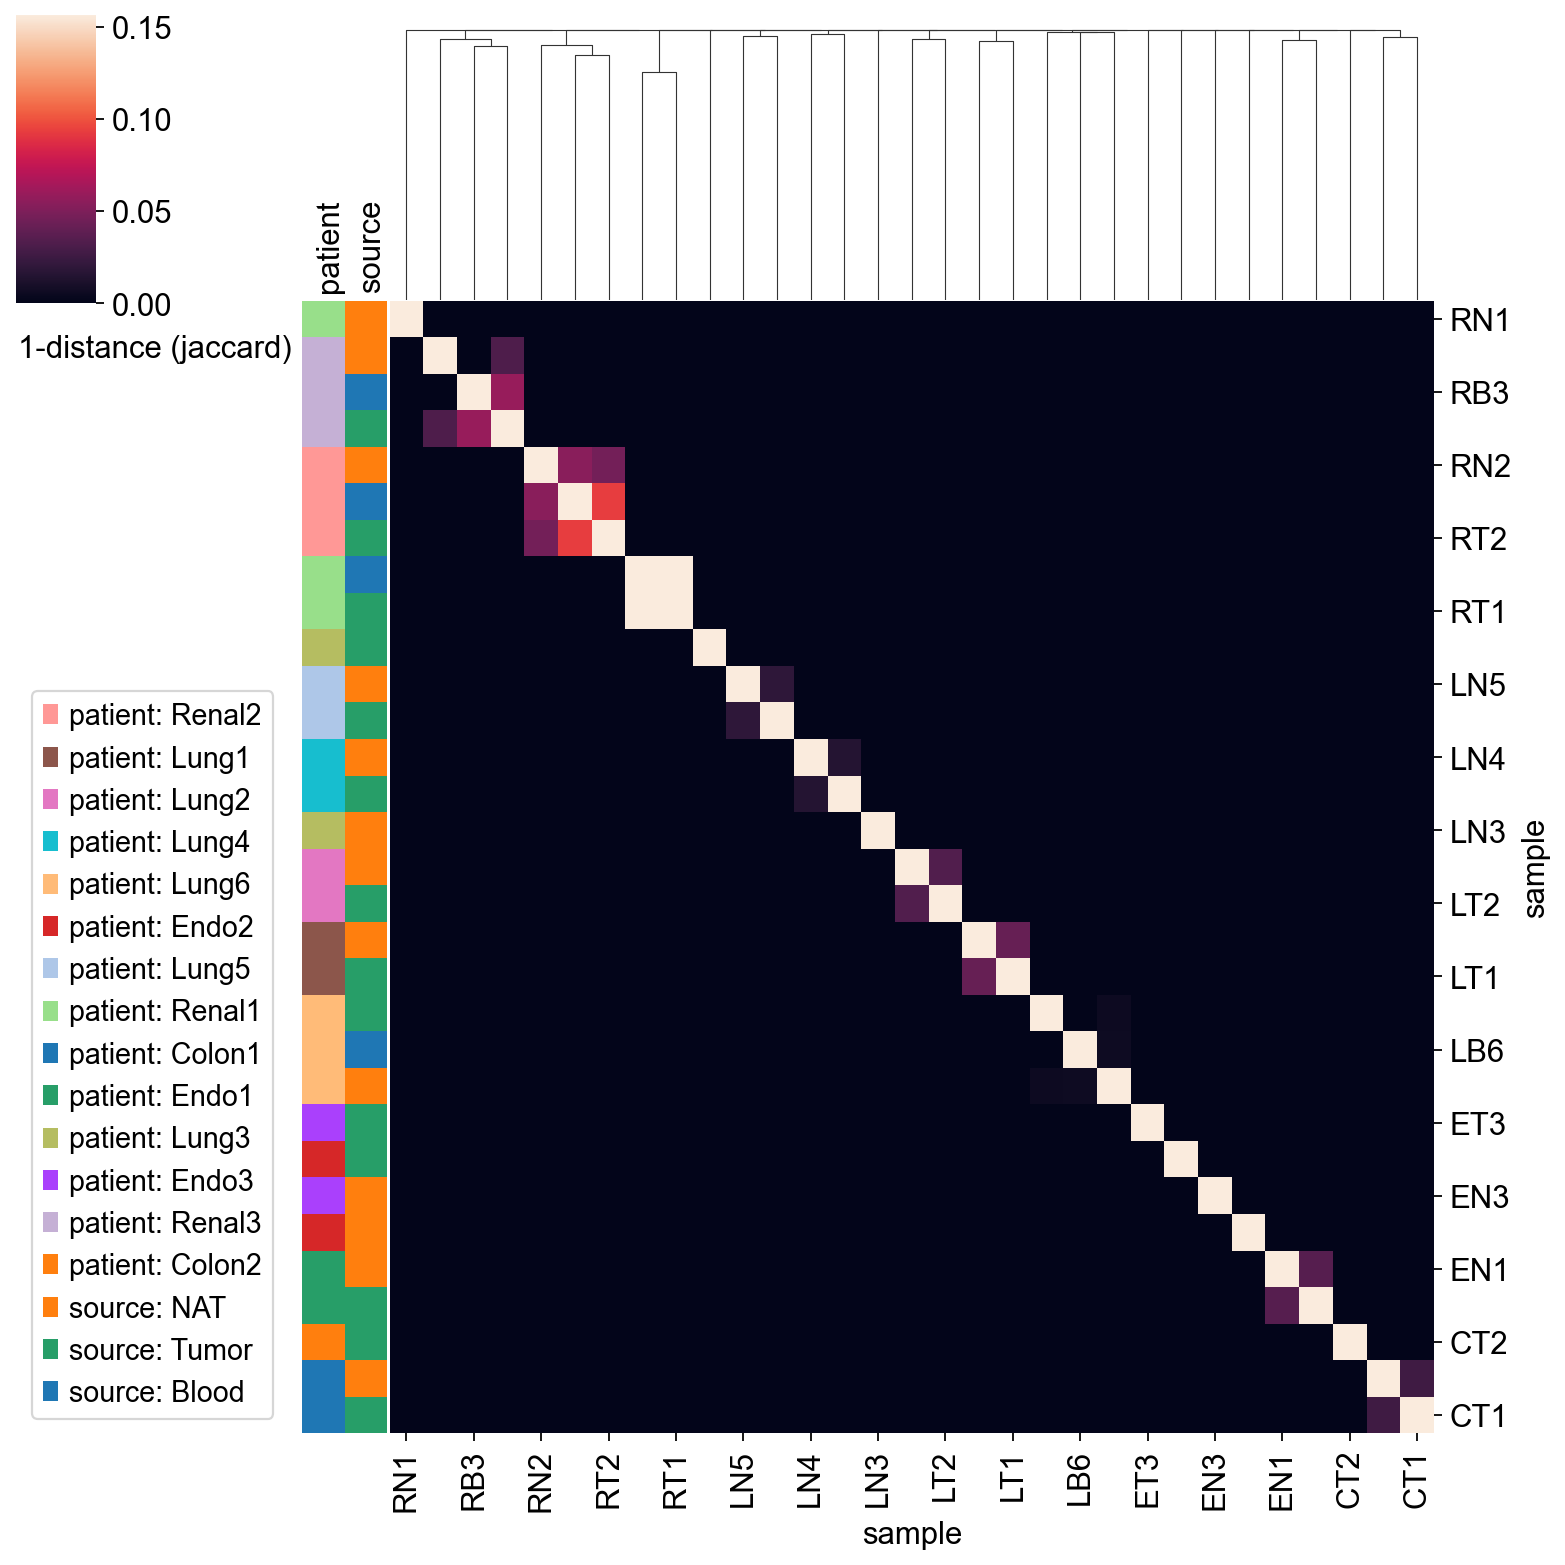

In [48]:
ir.pl.repertoire_overlap(adata, "sample", heatmap_cats=["patient", "source"])

A specific pair of samples can be compared on a scatterplot, where dot size corresponds to the number of clonotypes at a given coordinate.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between LN2 and LT2'}, xlabel='Clonotype size in LN2', ylabel='Clonotype size in LT2'>

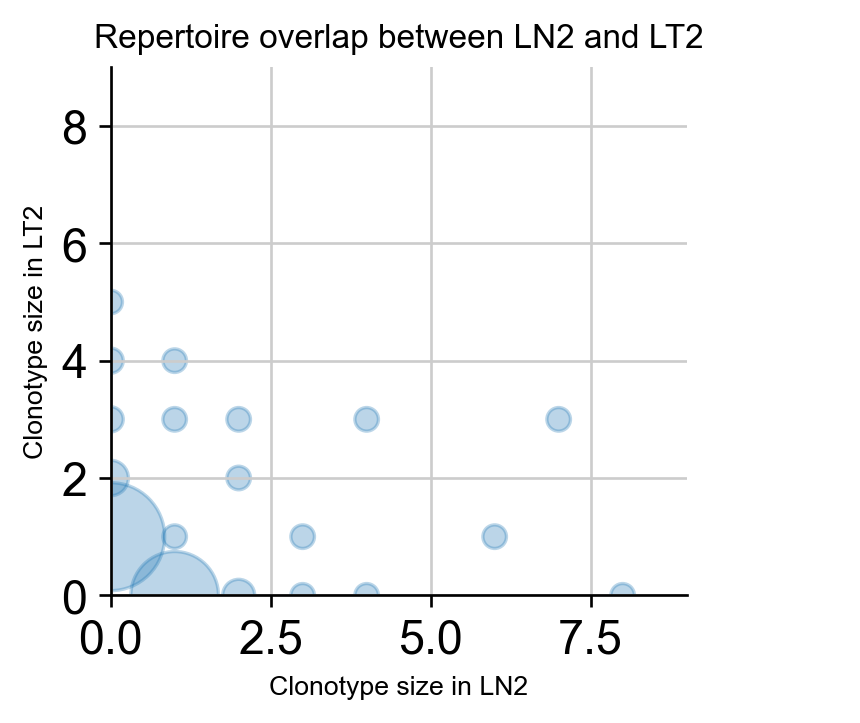

In [49]:
ir.pl.repertoire_overlap(
    adata, "sample", pair_to_plot=["LN2", "LT2"], fig_kws={"dpi": 120}
)

## Integrating gene expression data

Leveraging the opportunity offered by close integeration with scanpy, transcriptomics-based data can be utilized alongside immune receptor data.

### Clonotype modularity

In [50]:
ir.tl.clonotype_modularity(adata, target_col="cc_aa_alignment")

Initalizing clonotype subgraphs...


  0%|          | 0/1487 [00:00<?, ?it/s]

 22%|██▏       | 333/1487 [00:00<00:00, 3329.11it/s]

 45%|████▍     | 666/1487 [00:00<00:00, 3325.25it/s]

 67%|██████▋   | 999/1487 [00:00<00:00, 3312.29it/s]

 90%|████████▉ | 1331/1487 [00:00<00:00, 3265.87it/s]

100%|██████████| 1487/1487 [00:00<00:00, 3285.91it/s]

Computing background distributions...


  0%|          | 0/1000 [00:00<?, ?it/s]

  4%|▍         | 41/1000 [00:00<00:02, 403.45it/s]

  8%|▊         | 82/1000 [00:00<00:02, 399.24it/s]

 12%|█▏        | 122/1000 [00:00<00:02, 395.52it/s]

 16%|█▋        | 163/1000 [00:00<00:02, 399.11it/s]

 20%|██        | 203/1000 [00:00<00:01, 398.53it/s]

 24%|██▍       | 243/1000 [00:00<00:01, 398.49it/s]

 28%|██▊       | 284/1000 [00:00<00:01, 399.64it/s]

 32%|███▏      | 324/1000 [00:00<00:01, 397.35it/s]

 36%|███▋      | 364/1000 [00:00<00:01, 397.15it/s]

 40%|████      | 404/1000 [00:01<00:01, 397.62it/s]

 44%|████▍     | 444/1000 [00:01<00:01, 389.93it/s]

 48%|████▊     | 484/1000 [00:01<00:01, 391.48it/s]

 53%|█████▎    | 526/1000 [00:01<00:01, 397.14it/s]

 57%|█████▋    | 567/1000 [00:01<00:01, 399.95it/s]

 61%|██████    | 608/1000 [00:01<00:00, 399.98it/s]

 65%|██████▍   | 649/1000 [00:01<00:00, 402.37it/s]

 69%|██████▉   | 690/1000 [00:01<00:00, 399.93it/s]

 73%|███████▎  | 731/1000 [00:01<00:00, 395.29it/s]

 77%|███████▋  | 772/1000 [00:01<00:00, 396.93it/s]

 81%|████████  | 812/1000 [00:02<00:00, 397.43it/s]

 85%|████████▌ | 853/1000 [00:02<00:00, 399.65it/s]

 89%|████████▉ | 893/1000 [00:02<00:00, 398.53it/s]

 93%|█████████▎| 933/1000 [00:02<00:00, 394.93it/s]

 97%|█████████▋| 973/1000 [00:02<00:00, 393.60it/s]

100%|██████████| 1000/1000 [00:02<00:00, 396.81it/s]

We can plot the clonotype modularity on top of a umap of clonotype network plot

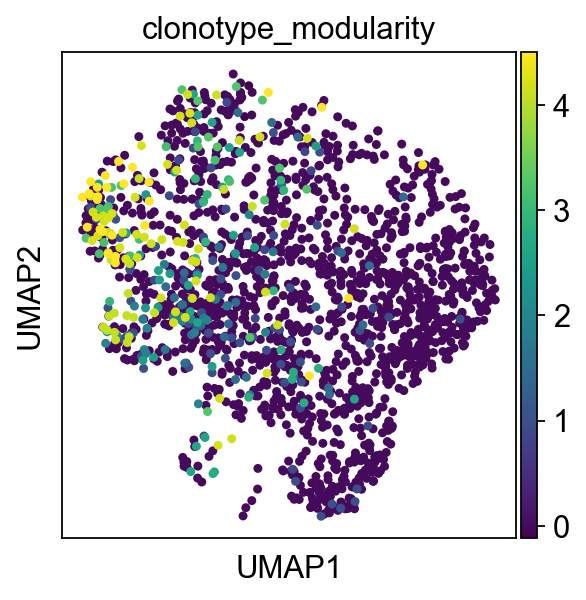

In [51]:
sc.pl.umap(adata, color="clonotype_modularity")

<AxesSubplot:>

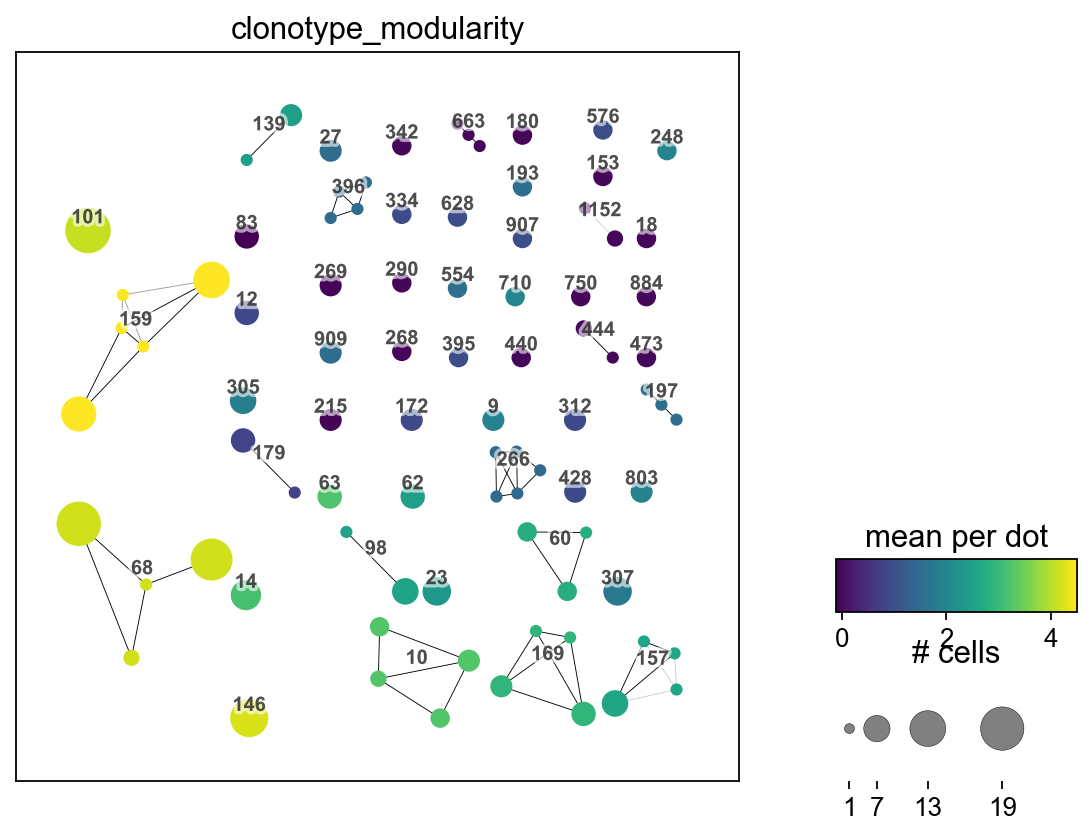

In [52]:
ir.pl.clonotype_network(
    adata,
    color="clonotype_modularity",
    label_fontsize=9,
    panel_size=(6, 6),
    base_size=20,
)

We can also visualize the clonotype modularity together with the associated
FDR as a sort of "one sided volcano plot":

<AxesSubplot:xlabel='modularity score', ylabel='-log10(FDR)'>

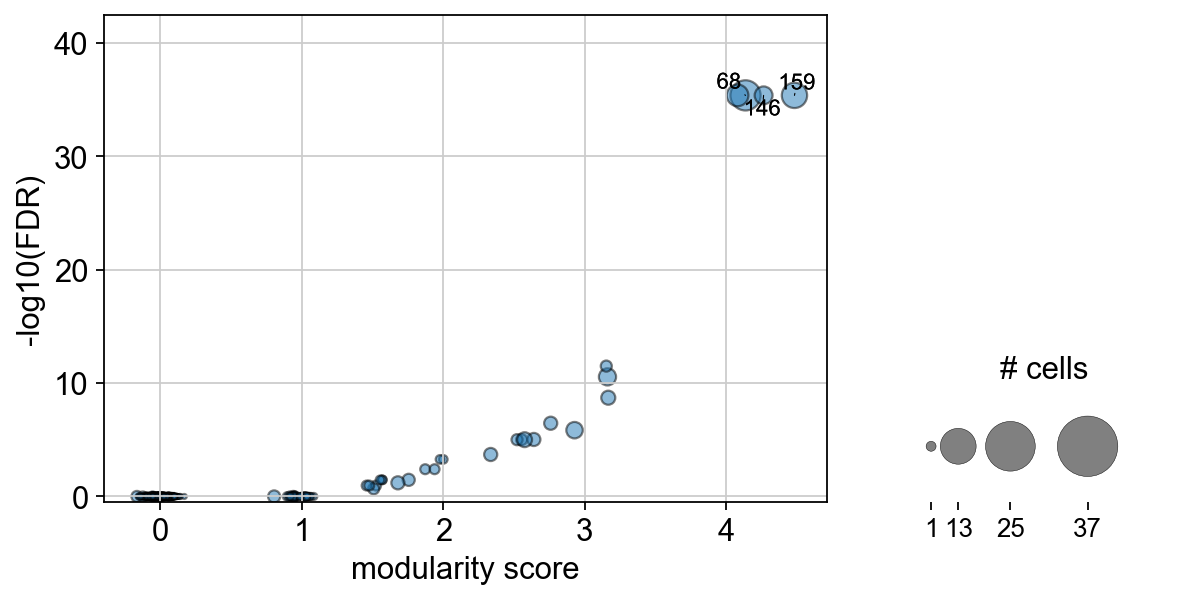

In [53]:
ir.pl.clonotype_modularity(adata, base_size=20)

Let's further inspect the two top scoring candidates. We can extract that information from `adata.obs["clonotype_modularity"]`. 

In [54]:
clonotypes_top_modularity = list(
    adata.obs.set_index("cc_aa_alignment")["clonotype_modularity"]
    .sort_values(ascending=False)
    .index.unique()
    .values[:2]
)

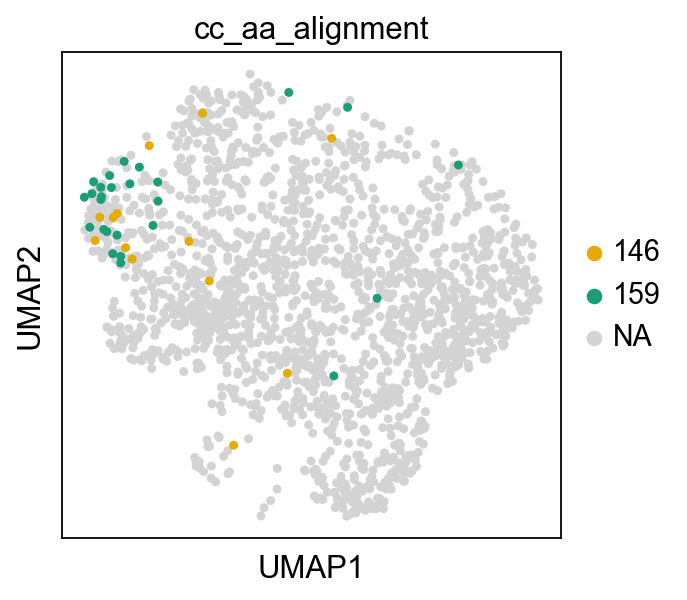

In [55]:
sc.pl.umap(
    adata,
    color="cc_aa_alignment",
    groups=clonotypes_top_modularity,
    palette=cycler(color=mpl_cm.Dark2_r.colors),
)

We observe that they are (mostly) restricted to a single cluster. By leveraging
scanpy's differential expression module, we can compare the gene expression 
of the cells in the two clonotypes to the rest. 

ranking genes


    finished (0:00:06)


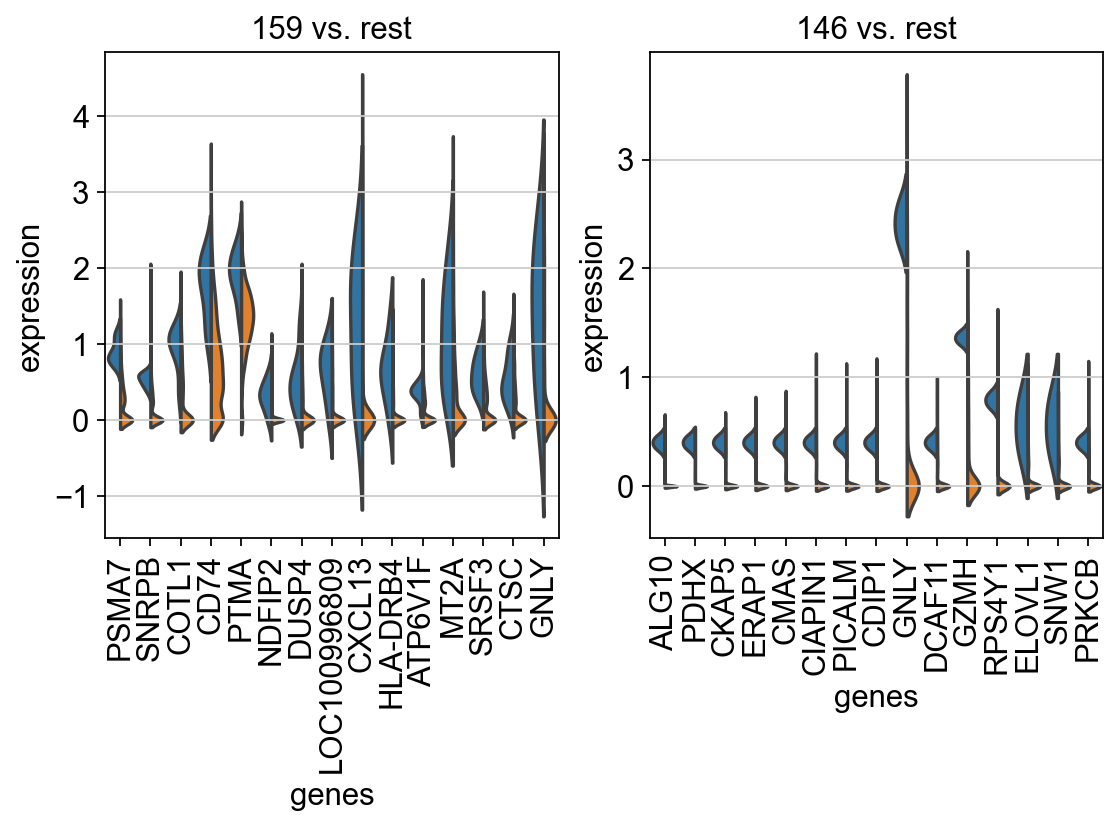

In [56]:
sc.tl.rank_genes_groups(
    adata,
    "clone_id",
    groups=clonotypes_top_modularity,
    reference="rest",
    method="wilcoxon",
)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for ct, ax in zip(clonotypes_top_modularity, axs):
    sc.pl.rank_genes_groups_violin(
        adata, groups=[ct], n_genes=15, ax=ax, show=False, strip=False
    )

### Clonotype imbalance among cell clusters

Using cell type annotation inferred from gene expression clusters, for example, clonotypes belonging to CD8+ effector T-cells and CD8+ tissue-resident memory T cells, can be compared.

In [57]:
freq, stat = ir.tl.clonotype_imbalance(
    adata,
    replicate_col="sample",
    groupby="cluster",
    case_label="CD8_Teff",
    control_label="CD8_Trm",
    inplace=False,
)
top_differential_clonotypes = stat["clone_id"].tolist()[:3]

/Users/runner/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/scirpy/tl/_clonotype_imbalance.py:280: RuntimeWarning: divide by zero encountered in log2
  logfoldchange = np.log2(


/Users/runner/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/scirpy/tl/_clonotype_imbalance.py:281: RuntimeWarning: divide by zero encountered in double_scalars
  (case_mean_freq + global_minimum) / (control_mean_freq + global_minimum)


Showing top clonotypes on a UMAP clearly shows that clonotype 101 is featured by CD8+ tissue-resident memory T cells, while clonotype 68 by CD8+ effector and effector memory cells. 

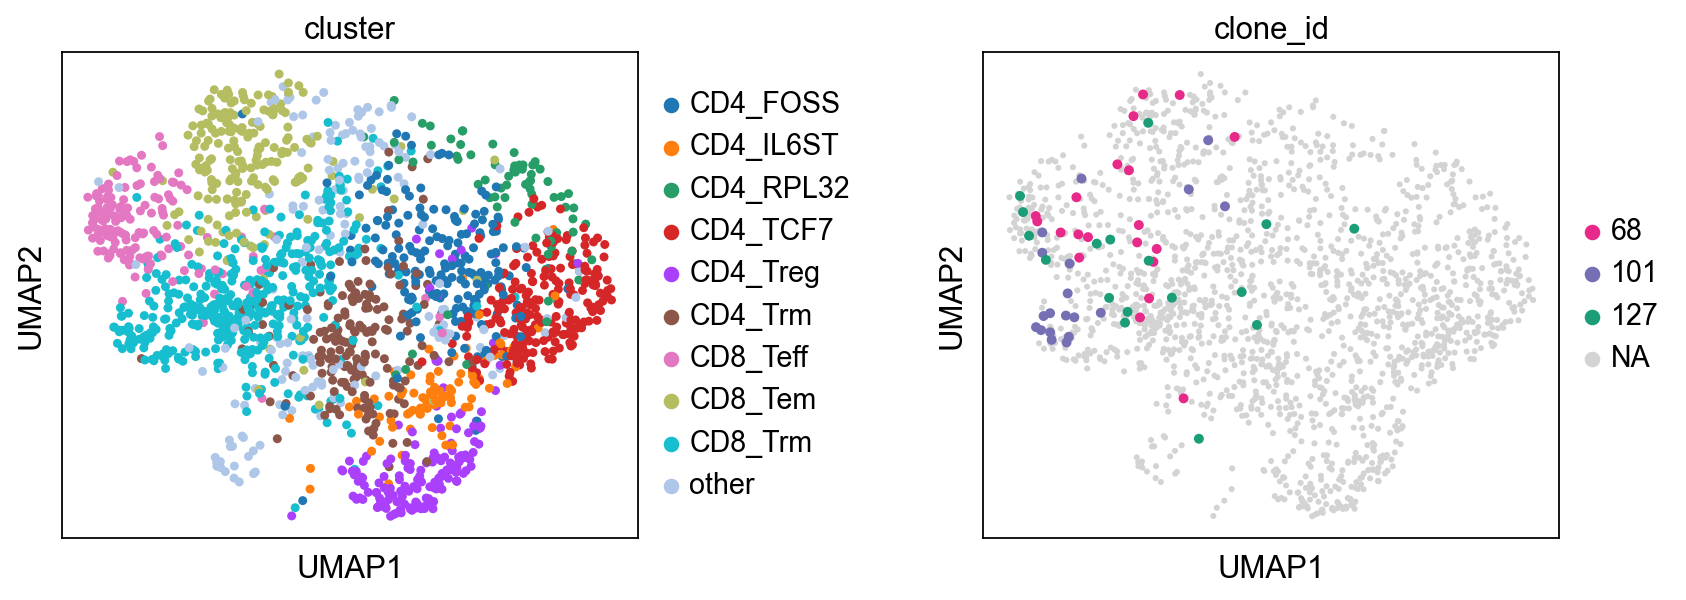

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"wspace": 0.6})
sc.pl.umap(adata, color="cluster", ax=ax1, show=False)
sc.pl.umap(
    adata,
    color="clone_id",
    groups=top_differential_clonotypes,
    ax=ax2,
    # increase size of highlighted dots
    size=[
        80 if c in top_differential_clonotypes else 30 for c in adata.obs["clone_id"]
    ],
    palette=cycler(color=mpl_cm.Dark2_r.colors),
)

### Repertoire overlap of cell types

Just like comparing repertoire overlap among samples, Scirpy also offers comparison between gene expression clusters or cell subpopulations. As an example, repertoire overlap of the two cell types compared above is shown.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Repertoire overlap between CD8_Teff and CD8_Trm'}, xlabel='Clonotype size in CD8_Teff', ylabel='Clonotype size in CD8_Trm'>

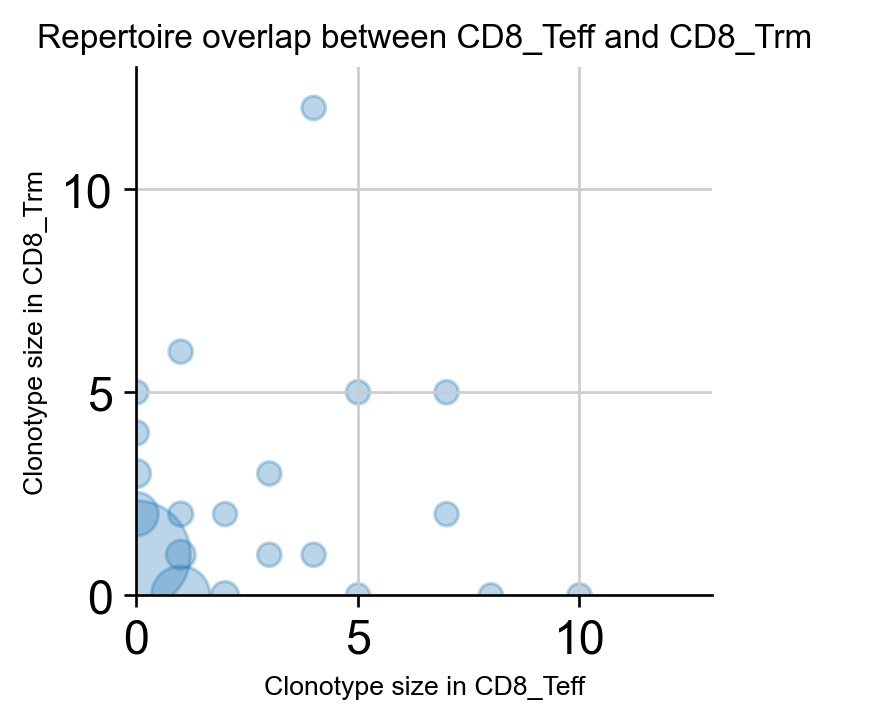

In [59]:
ir.tl.repertoire_overlap(adata, "cluster")
ir.pl.repertoire_overlap(
    adata, "cluster", pair_to_plot=["CD8_Teff", "CD8_Trm"], fig_kws={"dpi": 120}
)

### Marker genes in top clonotypes

Gene expression of cells belonging to individual clonotypes can also be compared using Scanpy. As an example, differential gene expression of two clonotypes, found to be specific to cell type clusters can also be analysed.

ranking genes


    finished (0:00:00)


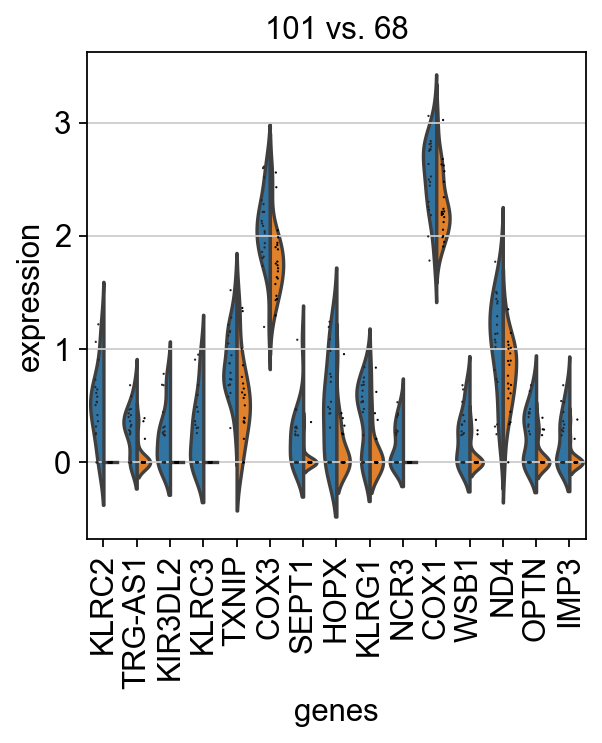

In [60]:
sc.tl.rank_genes_groups(
    adata, "clone_id", groups=["101"], reference="68", method="wilcoxon"
)
sc.pl.rank_genes_groups_violin(adata, groups="101", n_genes=15)

## Query epitope databases

In [61]:
vdjdb = ir.datasets.vdjdb()

/Users/runner/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/scirpy/datasets/__init__.py:131: DtypeWarning: Columns (20,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(d / "vdjdb_full.txt", sep="\t")


Processing VDJDB entries:   0%|          | 0/60055 [00:00<?, ?it/s]

Processing VDJDB entries:   0%|          | 161/60055 [00:00<00:37, 1606.91it/s]

Processing VDJDB entries:   1%|          | 431/60055 [00:00<00:26, 2246.57it/s]

Processing VDJDB entries:   1%|          | 678/60055 [00:00<00:25, 2347.95it/s]

Processing VDJDB entries:   2%|▏         | 918/60055 [00:00<00:25, 2363.46it/s]

Processing VDJDB entries:   2%|▏         | 1168/60055 [00:00<00:24, 2409.51it/s]

Processing VDJDB entries:   2%|▏         | 1409/60055 [00:00<00:25, 2318.05it/s]

Processing VDJDB entries:   3%|▎         | 1659/60055 [00:00<00:24, 2373.30it/s]

Processing VDJDB entries:   3%|▎         | 1912/60055 [00:00<00:24, 2419.60it/s]

Processing VDJDB entries:   4%|▎         | 2165/60055 [00:00<00:23, 2451.37it/s]

Processing VDJDB entries:   4%|▍         | 2415/60055 [00:01<00:23, 2464.96it/s]

Processing VDJDB entries:   4%|▍         | 2663/60055 [00:01<00:23, 2467.73it/s]

Processing VDJDB entries:   5%|▍         | 2919/60055 [00:01<00:22, 2495.56it/s]

Processing VDJDB entries:   5%|▌         | 3179/60055 [00:01<00:22, 2525.19it/s]

Processing VDJDB entries:   6%|▌         | 3440/60055 [00:01<00:22, 2549.04it/s]

Processing VDJDB entries:   6%|▌         | 3704/60055 [00:01<00:21, 2574.42it/s]

Processing VDJDB entries:   7%|▋         | 3962/60055 [00:01<00:21, 2569.19it/s]

Processing VDJDB entries:   7%|▋         | 4219/60055 [00:01<00:21, 2555.14it/s]

Processing VDJDB entries:   7%|▋         | 4475/60055 [00:01<00:21, 2549.37it/s]

Processing VDJDB entries:   8%|▊         | 4731/60055 [00:01<00:21, 2550.01it/s]

Processing VDJDB entries:   8%|▊         | 4987/60055 [00:02<00:21, 2512.89it/s]

Processing VDJDB entries:   9%|▊         | 5240/60055 [00:02<00:21, 2516.03it/s]

Processing VDJDB entries:   9%|▉         | 5492/60055 [00:02<00:22, 2463.31it/s]

Processing VDJDB entries:  10%|▉         | 5739/60055 [00:02<00:22, 2364.72it/s]

Processing VDJDB entries:  10%|▉         | 5977/60055 [00:02<00:23, 2348.54it/s]

Processing VDJDB entries:  10%|█         | 6224/60055 [00:02<00:22, 2383.07it/s]

Processing VDJDB entries:  11%|█         | 6485/60055 [00:02<00:21, 2448.18it/s]

Processing VDJDB entries:  11%|█         | 6742/60055 [00:02<00:21, 2483.57it/s]

Processing VDJDB entries:  12%|█▏        | 7006/60055 [00:02<00:20, 2528.90it/s]

Processing VDJDB entries:  12%|█▏        | 7271/60055 [00:02<00:20, 2564.43it/s]

Processing VDJDB entries:  13%|█▎        | 7536/60055 [00:03<00:20, 2588.94it/s]

Processing VDJDB entries:  13%|█▎        | 7797/60055 [00:03<00:20, 2595.07it/s]

Processing VDJDB entries:  13%|█▎        | 8062/60055 [00:03<00:19, 2609.48it/s]

Processing VDJDB entries:  14%|█▍        | 8324/60055 [00:03<00:19, 2598.67it/s]

Processing VDJDB entries:  14%|█▍        | 8584/60055 [00:03<00:19, 2594.41it/s]

Processing VDJDB entries:  15%|█▍        | 8844/60055 [00:03<00:19, 2577.48it/s]

Processing VDJDB entries:  15%|█▌        | 9102/60055 [00:03<00:19, 2578.18it/s]

Processing VDJDB entries:  16%|█▌        | 9360/60055 [00:03<00:19, 2572.71it/s]

Processing VDJDB entries:  16%|█▌        | 9620/60055 [00:03<00:19, 2579.17it/s]

Processing VDJDB entries:  16%|█▋        | 9878/60055 [00:03<00:19, 2573.60it/s]

Processing VDJDB entries:  17%|█▋        | 10143/60055 [00:04<00:19, 2595.80it/s]

Processing VDJDB entries:  17%|█▋        | 10411/60055 [00:04<00:18, 2618.81it/s]

Processing VDJDB entries:  18%|█▊        | 10673/60055 [00:04<00:18, 2600.67it/s]

Processing VDJDB entries:  18%|█▊        | 10934/60055 [00:04<00:19, 2503.88it/s]

Processing VDJDB entries:  19%|█▊        | 11186/60055 [00:04<00:20, 2435.80it/s]

Processing VDJDB entries:  19%|█▉        | 11471/60055 [00:04<00:19, 2551.94it/s]

Processing VDJDB entries:  20%|█▉        | 11733/60055 [00:04<00:18, 2571.69it/s]

Processing VDJDB entries:  20%|█▉        | 11993/60055 [00:04<00:18, 2579.37it/s]

Processing VDJDB entries:  20%|██        | 12252/60055 [00:04<00:18, 2580.43it/s]

Processing VDJDB entries:  21%|██        | 12511/60055 [00:04<00:18, 2582.04it/s]

Processing VDJDB entries:  21%|██▏       | 12770/60055 [00:05<00:18, 2584.06it/s]

Processing VDJDB entries:  22%|██▏       | 13029/60055 [00:05<00:18, 2581.65it/s]

Processing VDJDB entries:  22%|██▏       | 13292/60055 [00:05<00:18, 2594.96it/s]

Processing VDJDB entries:  23%|██▎       | 13555/60055 [00:05<00:17, 2602.43it/s]

Processing VDJDB entries:  23%|██▎       | 13817/60055 [00:05<00:17, 2607.07it/s]

Processing VDJDB entries:  23%|██▎       | 14078/60055 [00:05<00:17, 2607.56it/s]

Processing VDJDB entries:  24%|██▍       | 14339/60055 [00:05<00:17, 2599.98it/s]

Processing VDJDB entries:  24%|██▍       | 14600/60055 [00:05<00:17, 2592.92it/s]

Processing VDJDB entries:  25%|██▍       | 14862/60055 [00:05<00:17, 2599.01it/s]

Processing VDJDB entries:  25%|██▌       | 15122/60055 [00:05<00:17, 2586.70it/s]

Processing VDJDB entries:  26%|██▌       | 15381/60055 [00:06<00:29, 1533.17it/s]

Processing VDJDB entries:  26%|██▌       | 15648/60055 [00:06<00:25, 1761.91it/s]

Processing VDJDB entries:  26%|██▋       | 15907/60055 [00:06<00:22, 1945.40it/s]

Processing VDJDB entries:  27%|██▋       | 16173/60055 [00:06<00:20, 2117.78it/s]

Processing VDJDB entries:  27%|██▋       | 16417/60055 [00:06<00:19, 2196.64it/s]

Processing VDJDB entries:  28%|██▊       | 16673/60055 [00:06<00:18, 2292.95it/s]

Processing VDJDB entries:  28%|██▊       | 16930/60055 [00:06<00:18, 2369.21it/s]

Processing VDJDB entries:  29%|██▊       | 17188/60055 [00:07<00:17, 2426.79it/s]

Processing VDJDB entries:  29%|██▉       | 17441/60055 [00:07<00:17, 2453.94it/s]

Processing VDJDB entries:  29%|██▉       | 17698/60055 [00:07<00:17, 2484.67it/s]

Processing VDJDB entries:  30%|██▉       | 17952/60055 [00:07<00:17, 2475.73it/s]

Processing VDJDB entries:  30%|███       | 18203/60055 [00:07<00:17, 2413.77it/s]

Processing VDJDB entries:  31%|███       | 18448/60055 [00:07<00:17, 2422.76it/s]

Processing VDJDB entries:  31%|███       | 18705/60055 [00:07<00:16, 2464.53it/s]

Processing VDJDB entries:  32%|███▏      | 18966/60055 [00:07<00:16, 2505.44it/s]

Processing VDJDB entries:  32%|███▏      | 19225/60055 [00:07<00:16, 2528.07it/s]

Processing VDJDB entries:  32%|███▏      | 19479/60055 [00:07<00:16, 2528.80it/s]

Processing VDJDB entries:  33%|███▎      | 19733/60055 [00:08<00:16, 2499.43it/s]

Processing VDJDB entries:  33%|███▎      | 19990/60055 [00:08<00:15, 2519.73it/s]

Processing VDJDB entries:  34%|███▎      | 20243/60055 [00:08<00:15, 2514.81it/s]

Processing VDJDB entries:  34%|███▍      | 20495/60055 [00:08<00:15, 2472.83it/s]

Processing VDJDB entries:  35%|███▍      | 20750/60055 [00:08<00:15, 2494.36it/s]

Processing VDJDB entries:  35%|███▍      | 21009/60055 [00:08<00:15, 2522.49it/s]

Processing VDJDB entries:  35%|███▌      | 21262/60055 [00:08<00:16, 2402.88it/s]

Processing VDJDB entries:  36%|███▌      | 21504/60055 [00:08<00:16, 2368.44it/s]

Processing VDJDB entries:  36%|███▌      | 21742/60055 [00:08<00:16, 2353.23it/s]

Processing VDJDB entries:  37%|███▋      | 21981/60055 [00:08<00:16, 2362.40it/s]

Processing VDJDB entries:  37%|███▋      | 22240/60055 [00:09<00:15, 2427.34it/s]

Processing VDJDB entries:  37%|███▋      | 22499/60055 [00:09<00:15, 2472.64it/s]

Processing VDJDB entries:  38%|███▊      | 22754/60055 [00:09<00:14, 2493.11it/s]

Processing VDJDB entries:  38%|███▊      | 23004/60055 [00:09<00:14, 2491.23it/s]

Processing VDJDB entries:  39%|███▊      | 23254/60055 [00:09<00:15, 2410.42it/s]

Processing VDJDB entries:  39%|███▉      | 23496/60055 [00:09<00:15, 2373.68it/s]

Processing VDJDB entries:  40%|███▉      | 23734/60055 [00:09<00:15, 2328.05it/s]

Processing VDJDB entries:  40%|███▉      | 23968/60055 [00:09<00:15, 2276.85it/s]

Processing VDJDB entries:  40%|████      | 24197/60055 [00:09<00:15, 2264.15it/s]

Processing VDJDB entries:  41%|████      | 24425/60055 [00:10<00:15, 2266.86it/s]

Processing VDJDB entries:  41%|████      | 24652/60055 [00:10<00:15, 2246.07it/s]

Processing VDJDB entries:  41%|████▏     | 24879/60055 [00:10<00:15, 2252.13it/s]

Processing VDJDB entries:  42%|████▏     | 25105/60055 [00:10<00:15, 2238.89it/s]

Processing VDJDB entries:  42%|████▏     | 25329/60055 [00:10<00:15, 2221.71it/s]

Processing VDJDB entries:  43%|████▎     | 25552/60055 [00:10<00:15, 2209.44it/s]

Processing VDJDB entries:  43%|████▎     | 25773/60055 [00:10<00:15, 2204.99it/s]

Processing VDJDB entries:  43%|████▎     | 25997/60055 [00:10<00:15, 2213.89it/s]

Processing VDJDB entries:  44%|████▎     | 26219/60055 [00:10<00:15, 2215.66it/s]

Processing VDJDB entries:  44%|████▍     | 26442/60055 [00:10<00:15, 2217.23it/s]

Processing VDJDB entries:  44%|████▍     | 26668/60055 [00:11<00:14, 2229.32it/s]

Processing VDJDB entries:  45%|████▍     | 26891/60055 [00:11<00:14, 2215.80it/s]

Processing VDJDB entries:  45%|████▌     | 27116/60055 [00:11<00:14, 2225.03it/s]

Processing VDJDB entries:  46%|████▌     | 27341/60055 [00:11<00:14, 2232.22it/s]

Processing VDJDB entries:  46%|████▌     | 27567/60055 [00:11<00:14, 2238.02it/s]

Processing VDJDB entries:  46%|████▋     | 27792/60055 [00:11<00:14, 2241.27it/s]

Processing VDJDB entries:  47%|████▋     | 28017/60055 [00:11<00:14, 2224.16it/s]

Processing VDJDB entries:  47%|████▋     | 28240/60055 [00:11<00:14, 2215.98it/s]

Processing VDJDB entries:  47%|████▋     | 28462/60055 [00:11<00:14, 2213.36it/s]

Processing VDJDB entries:  48%|████▊     | 28684/60055 [00:11<00:14, 2202.09it/s]

Processing VDJDB entries:  48%|████▊     | 28905/60055 [00:12<00:14, 2197.87it/s]

Processing VDJDB entries:  49%|████▊     | 29128/60055 [00:12<00:14, 2205.78it/s]

Processing VDJDB entries:  49%|████▉     | 29349/60055 [00:12<00:13, 2203.05it/s]

Processing VDJDB entries:  49%|████▉     | 29570/60055 [00:12<00:13, 2195.89it/s]

Processing VDJDB entries:  50%|████▉     | 29793/60055 [00:12<00:13, 2205.33it/s]

Processing VDJDB entries:  50%|████▉     | 30016/60055 [00:12<00:13, 2211.15it/s]

Processing VDJDB entries:  50%|█████     | 30238/60055 [00:12<00:13, 2213.35it/s]

Processing VDJDB entries:  51%|█████     | 30460/60055 [00:12<00:13, 2195.19it/s]

Processing VDJDB entries:  51%|█████     | 30680/60055 [00:12<00:13, 2184.61it/s]

Processing VDJDB entries:  51%|█████▏    | 30900/60055 [00:12<00:13, 2188.58it/s]

Processing VDJDB entries:  52%|█████▏    | 31119/60055 [00:13<00:13, 2185.02it/s]

Processing VDJDB entries:  52%|█████▏    | 31343/60055 [00:13<00:13, 2200.03it/s]

Processing VDJDB entries:  53%|█████▎    | 31566/60055 [00:13<00:12, 2207.16it/s]

Processing VDJDB entries:  53%|█████▎    | 31787/60055 [00:13<00:12, 2203.79it/s]

Processing VDJDB entries:  53%|█████▎    | 32008/60055 [00:13<00:12, 2201.57it/s]

Processing VDJDB entries:  54%|█████▎    | 32229/60055 [00:13<00:12, 2197.59it/s]

Processing VDJDB entries:  54%|█████▍    | 32454/60055 [00:13<00:12, 2211.87it/s]

Processing VDJDB entries:  54%|█████▍    | 32676/60055 [00:13<00:12, 2187.93it/s]

Processing VDJDB entries:  55%|█████▍    | 32897/60055 [00:13<00:12, 2193.77it/s]

Processing VDJDB entries:  55%|█████▌    | 33117/60055 [00:13<00:12, 2195.27it/s]

Processing VDJDB entries:  56%|█████▌    | 33342/60055 [00:14<00:12, 2209.05it/s]

Processing VDJDB entries:  56%|█████▌    | 33563/60055 [00:14<00:12, 2201.92it/s]

Processing VDJDB entries:  56%|█████▋    | 33785/60055 [00:14<00:11, 2206.85it/s]

Processing VDJDB entries:  57%|█████▋    | 34008/60055 [00:14<00:11, 2211.07it/s]

Processing VDJDB entries:  57%|█████▋    | 34231/60055 [00:14<00:11, 2215.82it/s]

Processing VDJDB entries:  57%|█████▋    | 34453/60055 [00:14<00:11, 2184.93it/s]

Processing VDJDB entries:  58%|█████▊    | 34672/60055 [00:14<00:11, 2157.18it/s]

Processing VDJDB entries:  58%|█████▊    | 34888/60055 [00:14<00:11, 2113.74it/s]

Processing VDJDB entries:  58%|█████▊    | 35100/60055 [00:14<00:11, 2081.96it/s]

Processing VDJDB entries:  59%|█████▉    | 35339/60055 [00:14<00:11, 2169.68it/s]

Processing VDJDB entries:  59%|█████▉    | 35559/60055 [00:15<00:11, 2178.30it/s]

Processing VDJDB entries:  60%|█████▉    | 35778/60055 [00:15<00:11, 2164.49it/s]

Processing VDJDB entries:  60%|█████▉    | 35997/60055 [00:15<00:11, 2171.47it/s]

Processing VDJDB entries:  60%|██████    | 36215/60055 [00:15<00:10, 2172.04it/s]

Processing VDJDB entries:  61%|██████    | 36433/60055 [00:15<00:10, 2172.85it/s]

Processing VDJDB entries:  61%|██████    | 36651/60055 [00:15<00:10, 2145.94it/s]

Processing VDJDB entries:  61%|██████▏   | 36866/60055 [00:15<00:10, 2135.67it/s]

Processing VDJDB entries:  62%|██████▏   | 37084/60055 [00:15<00:10, 2148.58it/s]

Processing VDJDB entries:  62%|██████▏   | 37300/60055 [00:15<00:10, 2148.96it/s]

Processing VDJDB entries:  63%|██████▎   | 37539/60055 [00:15<00:10, 2218.73it/s]

Processing VDJDB entries:  63%|██████▎   | 37783/60055 [00:16<00:09, 2284.14it/s]

Processing VDJDB entries:  63%|██████▎   | 38012/60055 [00:16<00:09, 2258.84it/s]

Processing VDJDB entries:  64%|██████▎   | 38239/60055 [00:16<00:09, 2228.84it/s]

Processing VDJDB entries:  64%|██████▍   | 38463/60055 [00:16<00:09, 2214.46it/s]

Processing VDJDB entries:  64%|██████▍   | 38685/60055 [00:16<00:09, 2187.00it/s]

Processing VDJDB entries:  65%|██████▍   | 38905/60055 [00:16<00:09, 2188.17it/s]

Processing VDJDB entries:  65%|██████▌   | 39124/60055 [00:16<00:09, 2167.30it/s]

Processing VDJDB entries:  66%|██████▌   | 39341/60055 [00:16<00:09, 2159.03it/s]

Processing VDJDB entries:  66%|██████▌   | 39560/60055 [00:16<00:09, 2166.61it/s]

Processing VDJDB entries:  66%|██████▌   | 39777/60055 [00:17<00:09, 2157.50it/s]

Processing VDJDB entries:  67%|██████▋   | 39998/60055 [00:17<00:09, 2170.69it/s]

Processing VDJDB entries:  67%|██████▋   | 40216/60055 [00:17<00:09, 2166.72it/s]

Processing VDJDB entries:  67%|██████▋   | 40434/60055 [00:17<00:09, 2169.34it/s]

Processing VDJDB entries:  68%|██████▊   | 40652/60055 [00:17<00:08, 2172.38it/s]

Processing VDJDB entries:  68%|██████▊   | 40870/60055 [00:17<00:08, 2166.05it/s]

Processing VDJDB entries:  68%|██████▊   | 41087/60055 [00:17<00:08, 2162.23it/s]

Processing VDJDB entries:  69%|██████▉   | 41307/60055 [00:17<00:08, 2173.32it/s]

Processing VDJDB entries:  69%|██████▉   | 41525/60055 [00:17<00:08, 2159.00it/s]

Processing VDJDB entries:  70%|██████▉   | 41742/60055 [00:17<00:08, 2160.85it/s]

Processing VDJDB entries:  70%|██████▉   | 41960/60055 [00:18<00:08, 2163.72it/s]

Processing VDJDB entries:  70%|███████   | 42179/60055 [00:18<00:08, 2171.23it/s]

Processing VDJDB entries:  71%|███████   | 42398/60055 [00:18<00:08, 2174.42it/s]

Processing VDJDB entries:  71%|███████   | 42617/60055 [00:18<00:08, 2177.29it/s]

Processing VDJDB entries:  71%|███████▏  | 42840/60055 [00:18<00:07, 2191.38it/s]

Processing VDJDB entries:  72%|███████▏  | 43063/60055 [00:18<00:07, 2202.11it/s]

Processing VDJDB entries:  72%|███████▏  | 43284/60055 [00:18<00:07, 2181.79it/s]

Processing VDJDB entries:  72%|███████▏  | 43503/60055 [00:18<00:07, 2183.43it/s]

Processing VDJDB entries:  73%|███████▎  | 43723/60055 [00:18<00:07, 2186.74it/s]

Processing VDJDB entries:  73%|███████▎  | 43960/60055 [00:18<00:07, 2241.23it/s]

Processing VDJDB entries:  74%|███████▎  | 44210/60055 [00:19<00:06, 2318.52it/s]

Processing VDJDB entries:  74%|███████▍  | 44442/60055 [00:19<00:06, 2267.71it/s]

Processing VDJDB entries:  74%|███████▍  | 44670/60055 [00:19<00:06, 2239.99it/s]

Processing VDJDB entries:  75%|███████▍  | 44895/60055 [00:19<00:06, 2222.87it/s]

Processing VDJDB entries:  75%|███████▌  | 45118/60055 [00:19<00:06, 2223.37it/s]

Processing VDJDB entries:  75%|███████▌  | 45341/60055 [00:19<00:06, 2206.58it/s]

Processing VDJDB entries:  76%|███████▌  | 45562/60055 [00:19<00:06, 2188.39it/s]

Processing VDJDB entries:  76%|███████▌  | 45783/60055 [00:19<00:06, 2193.05it/s]

Processing VDJDB entries:  77%|███████▋  | 46003/60055 [00:19<00:06, 2181.09it/s]

Processing VDJDB entries:  77%|███████▋  | 46222/60055 [00:19<00:06, 2175.47it/s]

Processing VDJDB entries:  77%|███████▋  | 46440/60055 [00:20<00:06, 2175.76it/s]

Processing VDJDB entries:  78%|███████▊  | 46661/60055 [00:20<00:06, 2185.12it/s]

Processing VDJDB entries:  78%|███████▊  | 46901/60055 [00:20<00:05, 2247.46it/s]

Processing VDJDB entries:  79%|███████▊  | 47151/60055 [00:20<00:05, 2322.49it/s]

Processing VDJDB entries:  79%|███████▉  | 47403/60055 [00:20<00:05, 2380.05it/s]

Processing VDJDB entries:  79%|███████▉  | 47660/60055 [00:20<00:05, 2434.32it/s]

Processing VDJDB entries:  80%|███████▉  | 47904/60055 [00:20<00:05, 2393.64it/s]

Processing VDJDB entries:  80%|████████  | 48153/60055 [00:20<00:04, 2421.09it/s]

Processing VDJDB entries:  81%|████████  | 48414/60055 [00:20<00:04, 2476.95it/s]

Processing VDJDB entries:  81%|████████  | 48678/60055 [00:20<00:04, 2524.79it/s]

Processing VDJDB entries:  81%|████████▏ | 48941/60055 [00:21<00:04, 2554.55it/s]

Processing VDJDB entries:  82%|████████▏ | 49197/60055 [00:21<00:04, 2552.72it/s]

Processing VDJDB entries:  82%|████████▏ | 49476/60055 [00:21<00:04, 2621.85it/s]

Processing VDJDB entries:  83%|████████▎ | 49739/60055 [00:21<00:04, 2469.05it/s]

Processing VDJDB entries:  83%|████████▎ | 49988/60055 [00:21<00:04, 2408.08it/s]

Processing VDJDB entries:  84%|████████▎ | 50231/60055 [00:21<00:04, 2375.62it/s]

Processing VDJDB entries:  84%|████████▍ | 50470/60055 [00:21<00:04, 2371.07it/s]

Processing VDJDB entries:  84%|████████▍ | 50709/60055 [00:21<00:03, 2374.19it/s]

Processing VDJDB entries:  85%|████████▍ | 50962/60055 [00:21<00:03, 2418.41it/s]

Processing VDJDB entries:  85%|████████▌ | 51216/60055 [00:21<00:03, 2451.85it/s]

Processing VDJDB entries:  86%|████████▌ | 51481/60055 [00:22<00:03, 2508.83it/s]

Processing VDJDB entries:  86%|████████▌ | 51738/60055 [00:22<00:03, 2525.90it/s]

Processing VDJDB entries:  87%|████████▋ | 51991/60055 [00:22<00:03, 2526.22it/s]

Processing VDJDB entries:  87%|████████▋ | 52249/60055 [00:22<00:03, 2539.70it/s]

Processing VDJDB entries:  87%|████████▋ | 52504/60055 [00:22<00:02, 2541.22it/s]

Processing VDJDB entries:  88%|████████▊ | 52759/60055 [00:22<00:02, 2486.00it/s]

Processing VDJDB entries:  88%|████████▊ | 53008/60055 [00:22<00:02, 2430.71it/s]

Processing VDJDB entries:  89%|████████▊ | 53252/60055 [00:22<00:02, 2423.12it/s]

Processing VDJDB entries:  89%|████████▉ | 53514/60055 [00:22<00:02, 2476.17it/s]

Processing VDJDB entries:  90%|████████▉ | 53762/60055 [00:23<00:02, 2437.09it/s]

Processing VDJDB entries:  90%|████████▉ | 54009/60055 [00:23<00:02, 2446.46it/s]

Processing VDJDB entries:  90%|█████████ | 54269/60055 [00:23<00:02, 2490.35it/s]

Processing VDJDB entries:  91%|█████████ | 54521/60055 [00:23<00:02, 2498.98it/s]

Processing VDJDB entries:  91%|█████████ | 54773/60055 [00:23<00:02, 2504.72it/s]

Processing VDJDB entries:  92%|█████████▏| 55035/60055 [00:23<00:01, 2536.55it/s]

Processing VDJDB entries:  92%|█████████▏| 55289/60055 [00:23<00:03, 1479.42it/s]

Processing VDJDB entries:  92%|█████████▏| 55541/60055 [00:23<00:02, 1685.88it/s]

Processing VDJDB entries:  93%|█████████▎| 55793/60055 [00:24<00:02, 1868.86it/s]

Processing VDJDB entries:  93%|█████████▎| 56052/60055 [00:24<00:01, 2041.38it/s]

Processing VDJDB entries:  94%|█████████▎| 56288/60055 [00:24<00:01, 2098.59it/s]

Processing VDJDB entries:  94%|█████████▍| 56521/60055 [00:24<00:01, 2137.44it/s]

Processing VDJDB entries:  95%|█████████▍| 56752/60055 [00:24<00:01, 2176.25it/s]

Processing VDJDB entries:  95%|█████████▍| 56982/60055 [00:24<00:01, 2193.68it/s]

Processing VDJDB entries:  95%|█████████▌| 57213/60055 [00:24<00:01, 2224.40it/s]

Processing VDJDB entries:  96%|█████████▌| 57444/60055 [00:24<00:01, 2246.74it/s]

Processing VDJDB entries:  96%|█████████▌| 57674/60055 [00:24<00:01, 2205.79it/s]

Processing VDJDB entries:  96%|█████████▋| 57898/60055 [00:24<00:01, 2142.54it/s]

Processing VDJDB entries:  97%|█████████▋| 58125/60055 [00:25<00:00, 2176.58it/s]

Processing VDJDB entries:  97%|█████████▋| 58345/60055 [00:25<00:00, 2182.91it/s]

Processing VDJDB entries:  98%|█████████▊| 58569/60055 [00:25<00:00, 2197.76it/s]

Processing VDJDB entries:  98%|█████████▊| 58828/60055 [00:25<00:00, 2312.97it/s]

Processing VDJDB entries:  98%|█████████▊| 59086/60055 [00:25<00:00, 2391.44it/s]

Processing VDJDB entries:  99%|█████████▉| 59340/60055 [00:25<00:00, 2434.62it/s]

Processing VDJDB entries:  99%|█████████▉| 59590/60055 [00:25<00:00, 2452.72it/s]

Processing VDJDB entries: 100%|█████████▉| 59836/60055 [00:25<00:00, 2432.87it/s]

Processing VDJDB entries: 100%|██████████| 60055/60055 [00:25<00:00, 2320.31it/s]

Converting to AnnData object


/Users/runner/hostedtoolcache/Python/3.9.13/x64/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [62]:
ir.pp.ir_dist(adata, vdjdb, metric="identity", sequence="aa")

Computing sequence x sequence distance matrix for VJ sequences.


Computing sequence x sequence distance matrix for VDJ sequences.


In [63]:
ir.tl.ir_query(
    adata, vdjdb, metric="identity", sequence="aa", receptor_arms="any", dual_ir="any"
)

Initializing lookup tables. 


Computing clonotype x clonotype distances.


  0%|          | 0/1549 [00:00<?, ?it/s]

  1%|          | 16/1549 [00:00<00:09, 158.69it/s]

  2%|▏         | 33/1549 [00:00<00:09, 162.44it/s]

  3%|▎         | 50/1549 [00:00<00:09, 163.91it/s]

  4%|▍         | 67/1549 [00:00<00:09, 163.81it/s]

  5%|▌         | 84/1549 [00:00<00:08, 164.29it/s]

  7%|▋         | 101/1549 [00:00<00:08, 163.61it/s]

  8%|▊         | 118/1549 [00:00<00:08, 162.64it/s]

  9%|▊         | 135/1549 [00:00<00:08, 160.24it/s]

 10%|▉         | 152/1549 [00:00<00:08, 162.14it/s]

 11%|█         | 169/1549 [00:01<00:08, 159.28it/s]

 12%|█▏        | 185/1549 [00:01<00:08, 158.97it/s]

 13%|█▎        | 202/1549 [00:01<00:08, 160.63it/s]

 14%|█▍        | 219/1549 [00:01<00:08, 159.24it/s]

 15%|█▌        | 235/1549 [00:01<00:08, 158.21it/s]

 16%|█▋        | 252/1549 [00:01<00:08, 157.81it/s]

 17%|█▋        | 268/1549 [00:01<00:08, 157.88it/s]

 18%|█▊        | 284/1549 [00:01<00:08, 157.79it/s]

 19%|█▉        | 300/1549 [00:01<00:07, 156.74it/s]

 20%|██        | 316/1549 [00:01<00:07, 156.90it/s]

 21%|██▏       | 333/1549 [00:02<00:07, 158.22it/s]

 23%|██▎       | 350/1549 [00:02<00:07, 159.97it/s]

 24%|██▎       | 366/1549 [00:02<00:07, 158.08it/s]

 25%|██▍       | 382/1549 [00:02<00:07, 157.17it/s]

 26%|██▌       | 399/1549 [00:02<00:07, 160.23it/s]

 27%|██▋       | 416/1549 [00:02<00:07, 156.96it/s]

 28%|██▊       | 432/1549 [00:02<00:07, 153.98it/s]

 29%|██▉       | 449/1549 [00:02<00:07, 156.06it/s]

 30%|███       | 465/1549 [00:02<00:07, 152.63it/s]

 31%|███       | 482/1549 [00:03<00:06, 155.86it/s]

 32%|███▏      | 499/1549 [00:03<00:06, 158.85it/s]

 33%|███▎      | 516/1549 [00:03<00:06, 159.52it/s]

 34%|███▍      | 532/1549 [00:03<00:06, 156.90it/s]

 35%|███▌      | 549/1549 [00:03<00:06, 158.12it/s]

 37%|███▋      | 566/1549 [00:03<00:06, 159.94it/s]

 38%|███▊      | 583/1549 [00:03<00:06, 158.42it/s]

 39%|███▊      | 600/1549 [00:03<00:05, 159.57it/s]

 40%|███▉      | 616/1549 [00:03<00:05, 157.42it/s]

 41%|████      | 632/1549 [00:03<00:05, 157.86it/s]

 42%|████▏     | 648/1549 [00:04<00:05, 157.55it/s]

 43%|████▎     | 664/1549 [00:04<00:05, 155.92it/s]

 44%|████▍     | 681/1549 [00:04<00:05, 157.73it/s]

 45%|████▌     | 698/1549 [00:04<00:05, 158.62it/s]

 46%|████▌     | 714/1549 [00:04<00:05, 158.56it/s]

 47%|████▋     | 731/1549 [00:04<00:05, 158.56it/s]

 48%|████▊     | 747/1549 [00:04<00:05, 158.02it/s]

 49%|████▉     | 764/1549 [00:04<00:04, 158.16it/s]

 50%|█████     | 780/1549 [00:04<00:04, 157.48it/s]

 51%|█████▏    | 796/1549 [00:05<00:04, 158.13it/s]

 52%|█████▏    | 812/1549 [00:05<00:04, 158.42it/s]

 53%|█████▎    | 828/1549 [00:05<00:04, 157.85it/s]

 55%|█████▍    | 845/1549 [00:05<00:04, 159.48it/s]

 56%|█████▌    | 861/1549 [00:05<00:04, 156.95it/s]

 57%|█████▋    | 878/1549 [00:05<00:04, 158.17it/s]

 58%|█████▊    | 894/1549 [00:05<00:04, 157.87it/s]

 59%|█████▊    | 910/1549 [00:05<00:04, 155.25it/s]

 60%|█████▉    | 927/1549 [00:05<00:03, 157.76it/s]

 61%|██████    | 944/1549 [00:05<00:03, 158.44it/s]

 62%|██████▏   | 960/1549 [00:06<00:03, 156.29it/s]

 63%|██████▎   | 977/1549 [00:06<00:03, 157.25it/s]

 64%|██████▍   | 995/1549 [00:06<00:03, 162.25it/s]

 65%|██████▌   | 1012/1549 [00:06<00:03, 161.77it/s]

 66%|██████▋   | 1029/1549 [00:06<00:03, 159.75it/s]

 67%|██████▋   | 1045/1549 [00:06<00:03, 158.96it/s]

 68%|██████▊   | 1061/1549 [00:06<00:03, 159.23it/s]

 70%|██████▉   | 1078/1549 [00:06<00:02, 160.66it/s]

 71%|███████   | 1095/1549 [00:06<00:02, 160.71it/s]

 72%|███████▏  | 1112/1549 [00:07<00:02, 156.22it/s]

 73%|███████▎  | 1128/1549 [00:07<00:02, 155.43it/s]

 74%|███████▍  | 1144/1549 [00:07<00:02, 156.69it/s]

 75%|███████▍  | 1160/1549 [00:07<00:02, 157.30it/s]

 76%|███████▌  | 1176/1549 [00:07<00:02, 157.64it/s]

 77%|███████▋  | 1192/1549 [00:07<00:02, 157.45it/s]

 78%|███████▊  | 1208/1549 [00:07<00:02, 156.12it/s]

 79%|███████▉  | 1224/1549 [00:07<00:02, 156.90it/s]

 80%|████████  | 1240/1549 [00:07<00:01, 156.56it/s]

 81%|████████  | 1256/1549 [00:07<00:01, 154.91it/s]

 82%|████████▏ | 1272/1549 [00:08<00:01, 155.89it/s]

 83%|████████▎ | 1288/1549 [00:08<00:01, 156.75it/s]

 84%|████████▍ | 1305/1549 [00:08<00:01, 158.74it/s]

 85%|████████▌ | 1322/1549 [00:08<00:01, 159.86it/s]

 86%|████████▋ | 1338/1549 [00:08<00:01, 158.87it/s]

 87%|████████▋ | 1355/1549 [00:08<00:01, 161.49it/s]

 89%|████████▊ | 1373/1549 [00:08<00:01, 164.85it/s]

 90%|████████▉ | 1390/1549 [00:08<00:00, 163.54it/s]

 91%|█████████ | 1408/1549 [00:08<00:00, 165.93it/s]

 92%|█████████▏| 1425/1549 [00:08<00:00, 165.01it/s]

 93%|█████████▎| 1442/1549 [00:09<00:00, 162.90it/s]

 94%|█████████▍| 1459/1549 [00:09<00:00, 163.34it/s]

 95%|█████████▌| 1476/1549 [00:09<00:00, 162.25it/s]

 96%|█████████▋| 1493/1549 [00:09<00:00, 164.25it/s]

 97%|█████████▋| 1510/1549 [00:09<00:00, 165.58it/s]

 99%|█████████▊| 1527/1549 [00:09<00:00, 164.78it/s]

100%|█████████▉| 1544/1549 [00:09<00:00, 165.18it/s]

100%|██████████| 1549/1549 [00:09<00:00, 159.23it/s]

Stored IR distance matrix in `adata.uns["ir_query_VDJDB_aa_identity"]`.


In [64]:
ir.tl.ir_query_annotate_df(
    adata,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species", "antigen.gene"],
).tail()

antigen.species antigen.gene
RT3_TCTCTAATCACAATGC-1-6             CMV          IE1
RT3_TCTCTAATCACAATGC-1-6             CMV          IE1
RT3_TCTCTAATCACAATGC-1-6             CMV          IE1
RT3_TCTCTAATCACAATGC-1-6      InfluenzaA           NP
RT3_TCTCTAATCACAATGC-1-6      SARS-CoV-2        ORF9b

In [65]:
ir.tl.ir_query_annotate(
    adata,
    vdjdb,
    metric="identity",
    sequence="aa",
    include_ref_cols=["antigen.species"],
    strategy="most-frequent",
)

  0%|          | 0/315 [00:00<?, ?it/s]

 63%|██████▎   | 199/315 [00:00<00:00, 1989.16it/s]

100%|██████████| 315/315 [00:00<00:00, 1950.50it/s]

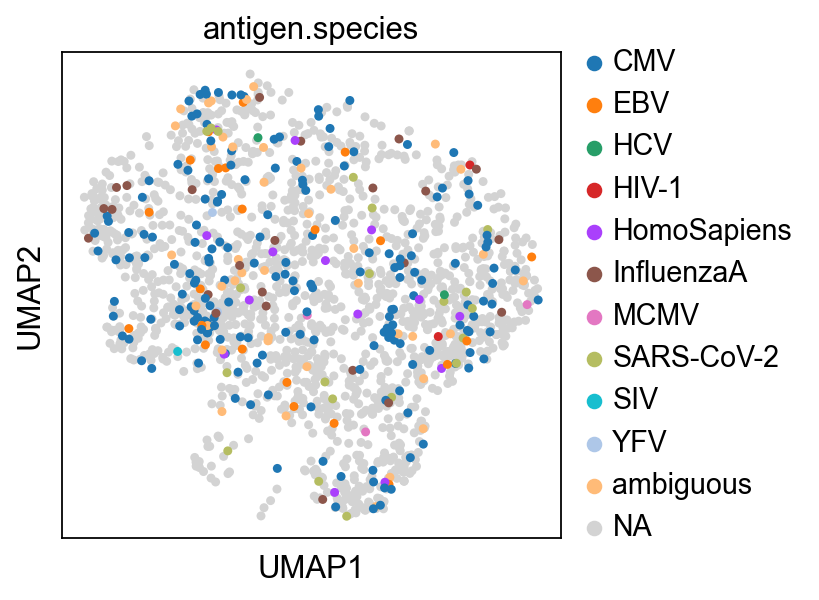

In [66]:
sc.pl.umap(adata, color="antigen.species")